<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Михаил, привет!👋</b> 

Меня зовут Кирилл Васильев, мы уже встречались на проекте «Линейные модели». Рад снова быть ревьюером твоей работы!


Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 
 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.



# Разработка модели для предсказания снижения покупательской активности

## Описание проекта





Для выполнения работы предоставляются четрые датасета.

1. Файл market_file.csv  содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Описание столбцов:

    - id — номер покупателя в корпоративной базе данных;
    - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»;
    - Тип сервиса — уровень сервиса, например «премиум» и «стандарт»;
    - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;
    - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента;
    - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце;
    - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
    - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
    - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев;
    - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
    - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца;
    - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта;
    - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
    

2. Файл market_money.csv содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Описание столбцов:

    - id — номер покупателя в корпоративной базе данных;
    - Период — название периода, во время которого зафиксирована выручка. Например: 'текущий_месяц' или 'предыдущий_месяц';
    - Выручка — сумма выручки за период.


3. Файл market_time.csv содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. Описание столбцов:

    - id — номер покупателя в корпоративной базе данных;
    - Период — название периода, во время которого зафиксировано общее время;
    - минут — значение времени, проведённого на сайте, в минутах.


4. Файл money.csv содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Содержание столбцов:

    - id — номер покупателя в корпоративной базе данных;
    - Прибыль — значение прибыли.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Контекст и план проекта понятны.
</div>  
  


## Загрузка данных

Загрузка библиотек.

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, RobustScaler, PolynomialFeatures)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             confusion_matrix, roc_auc_score, f1_score)
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif
from optuna.integration import OptunaSearchCV
from optuna import distributions
import phik
import shap

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отлично, что не оставляешь длинных строк.
</div>  
  


Чтение csv файлов.

In [2]:
try:
    data_market_file = pd.read_csv('market_file.csv', sep=',')
except:
    data_market_file = pd.read_csv('/datasets/market_file.csv', sep=',')

In [3]:
try:
    data_market_money = pd.read_csv('market_money.csv', sep=',')
except:
    data_market_money = pd.read_csv('/datasets/market_money.csv', sep=',')

In [4]:
try:
    data_market_time = pd.read_csv('market_time.csv', sep=',')
except:
    data_market_time = pd.read_csv('/datasets/market_time.csv', sep=',')

In [5]:
try:
    data_money = pd.read_csv('money.csv', sep=';', decimal=',')
except:
    data_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Верно по загрузкам.
</div>  
  


Функция для отображения информации о данных.

In [6]:
def show_info(df):
    print(df.info())
    return df.head()

In [7]:
show_info(data_market_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

Пропусков и несоответствия типов данных в датасете нет.

In [8]:
show_info(data_market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

Пропусков и несоответствия типов данных в датасете нет.

In [9]:
show_info(data_market_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

Пропусков и несоответствия типов данных в датасете нет.

In [10]:
show_info(data_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

Пропусков и несоответствия типов данных в датасете нет. Прибыль указана скорее всего в тысячах рублей, т.к. данные не соответствуют другим датафреймам.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Да, скорее всего прибыль в тысячах рублей. 

## Предобработка данных

Поправим названия столбцов на более удобные.

In [11]:
data_market_file.columns = [
    'id', 'Покупательская_активность', 'Тип_сервиса',
    'Разрешить_сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес',
    'Длительность', 'Акционные_покупки', 'Популярная_категория',
    'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса', 'Страниц_за_визит'
]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Здесь можно привести к змеиному стилю. В таком случае названия колонок пишем с маленькой буквы.

In [12]:
show_info(data_market_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

### Явные дубликаты

Проверим датасеты на наличие явных дубликатов.

In [13]:
data_market_file.duplicated().sum()

0

In [14]:
data_market_money.duplicated().sum()

0

In [15]:
data_market_time.duplicated().sum()

0

In [16]:
data_money.duplicated().sum()

0

В данных явных дубликатов нет.

### Неявные дубликаты

Проверим категориальные столбцы на наличие неявных дубликатов. Для поиска неявных дубликатов в категориальных столбцах напишем функцию.

In [17]:
def non_exact_duplicates(data):
    for column in data.select_dtypes(exclude='number'):
        print(f'Столбец "{column}": {data[column].unique()}')

In [18]:
non_exact_duplicates(data_market_file)

Столбец "Покупательская_активность": ['Снизилась' 'Прежний уровень']
Столбец "Тип_сервиса": ['премиум' 'стандартт' 'стандарт']
Столбец "Разрешить_сообщать": ['да' 'нет']
Столбец "Популярная_категория": ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [19]:
non_exact_duplicates(data_market_money)

Столбец "Период": ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [20]:
non_exact_duplicates(data_market_time)

Столбец "Период": ['текущий_месяц' 'предыдцщий_месяц']


В столбце "Тип сервиса" из датасета data_market_file есть опечатка. В датасете data_market_time есть опечатка в 'предыдцщий_месяц'. Поправим эти ошибки.

In [21]:
data_market_file.loc[data_market_file['Тип_сервиса'] == 'стандартт', 'Тип_сервиса'] = 'стандарт'

In [22]:
data_market_time.loc[data_market_time['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'

In [23]:
non_exact_duplicates(data_market_time)

Столбец "Период": ['текущий_месяц' 'предыдущий_месяц']


### Вывод

Все проблемы в данных были исправлены.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отлично по исправлению опечаток. 
    
У нас данные внутренней аналитики, они действительно чаще бывают относительно чистыми. Дадасет качественный

## Исследовательский анализ данных

### Функции для построения графиков

In [24]:
# Функция для построения гистограммы и диаграммы размаха 
# Принимает на вход столбец датафрейма, заголовок и подпись оси x

def hist_box_plot(series, bins, title='', x_lable=''):
    
    # Создаем рисунок из двух графиков с общей осью x
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7))
    
    # Задаем первый график - гистограмма
    plot_hist = ax1.hist(
        series,    
        bins=bins, 
        edgecolor='black'
        )
    
    # Вычисляем и добавляем на график линию среднего значения
    ax1.vlines(
        x=series.mean(), 
        colors='red', 
        ymin=0, 
        ymax=plot_hist[0].max(), 
        label='Среднее')
    
    # Вычисляем и добавляем на график линию медианного значения
    ax1.vlines(
        x=series.median(), 
        colors='red', 
        ymin=0, 
        ymax=plot_hist[0].max(), 
        linestyles='--', 
        label='Медиана')
    

    # Задаем параметры гистограммы, заголовок, подпись оси y, сетка 
    ax1.set_ylabel('Часота', fontsize=12)
    ax1.set_title('Гистограмма')
    ax1.grid(True)
    
    # Задаем отображение легенды, чтобы отображалась легенда линий среднего и медианы
    ax1.legend()
    
    # Строим второй график - диаграмму размаха
    ax2.boxplot(series, vert=False)
    
    # Задаем параметры 
    plt.xlabel(x_lable, fontsize=12)
    plt.grid(True)
    plt.yticks([])
    ax2.set_ylabel('Диаграмма размаха', fontsize=12)

    # Выводим общий заголовок
    fig.suptitle(title)
    
    # Выводим графики на экран
    plt.show()
    
    # Выводим на экран статистику столбца
    print(series.describe())

In [25]:
# Функция для построения гистограммы и диаграммы размаха 
# Принимает на вход столбец датафрейма, заголовок и подпись оси x

def hist_box_plot2(df, feature, bins, title='', x_lable=''):
    
    series_1 = df.loc[df['Покупательская_активность'] == 'Снизилась', feature]
    series_2 = df.loc[df['Покупательская_активность'] == 'Прежний уровень', feature]
    # Создаем рисунок из двух графиков с общей осью x
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7))
    
    # Задаем первый график - гистограмма
    plot_hist = ax1.hist(
        [series_1, series_2],    
        bins=bins, 
        #edgecolor='black',
        fill=False,
        histtype='step',
        color=['blue', 'red'],
        label=['Снизилась', 'Прежний уровень']
        )
    
    # Вычисляем и добавляем на график линию среднего значения
    ax1.vlines(
        x=series_1.mean(), 
        colors='blue', 
        ymin=0, 
        ymax=plot_hist[0].max(), 
        label='Среднее')
    
    # Вычисляем и добавляем на график линию медианного значения
    ax1.vlines(
        x=series_1.median(), 
        colors='blue', 
        ymin=0, 
        ymax=plot_hist[0].max(), 
        linestyles='--', 
        label='Медиана')
    

    ax1.vlines(
        x=series_2.mean(), 
        colors='red', 
        ymin=0, 
        ymax=plot_hist[0].max(), 
        #label='Среднее'
    )
    
    # Вычисляем и добавляем на график линию медианного значения
    ax1.vlines(
        x=series_2.median(), 
        colors='red', 
        ymin=0, 
        ymax=plot_hist[0].max(), 
        linestyles='--', 
        #label='Медиана'
    )
    
    
    # Задаем параметры гистограммы, заголовок, подпись оси y, сетка 
    ax1.set_ylabel('Часота', fontsize=12)
    ax1.set_title('Гистограмма')
    ax1.grid(True)
    
    # Задаем отображение легенды, чтобы отображалась легенда линий среднего и медианы
    ax1.legend()
    
    # Строим второй график - диаграмму размаха
    ax2.boxplot([series_1, series_2], 
                vert=False, 
                tick_labels=['Снизилась', 'Прежний уровень'])
    
    # Задаем параметры 
    plt.xlabel(x_lable, fontsize=12)
    plt.grid(True)
#    plt.yticks([])
    ax2.set_ylabel('Диаграмма размаха', fontsize=12)

    # Выводим общий заголовок
    fig.suptitle(title)
    
    # Выводим графики на экран
    plt.show()
    
    # Выводим на экран статистику столбца
    print('Покупательская активность снизилась \n', series_1.describe())
    print()
    print('Покупательская активность на прежнем уровне \n', series_2.describe())

In [26]:
# Функция принимает столбец с категориальным признаком и название графика
def cat_plot(series, title='', x_label='', rot=0):
    
    
    if len(series.unique()) == 2:
    # Для признаков с двумя строится круговая диаграмм
    # Считаем количество каждой категории и строим круговую диаграмму
        series.value_counts().plot(
            kind='pie',
            ylabel='',
            legend=False,
            autopct='%.1f%%',
            figsize=(5, 5),
            fontsize=14,
            rot=rot,
            )
    
    # Для признаков, у которых больше двух категорий строится столбчатая диаграмма
    else:
        series.value_counts().sort_values().plot(
            kind='bar',
            ylabel='Количество',
            legend=False,
            figsize=(5, 5),
            rot=rot,
            grid=True,
            )
        
    
    # Задаем заголовок графика
    plt.title(title, fontsize=12)
    
    # Выводим график на экран
    plt.show()

### Анализ количественных признаков data_market_file

In [27]:
show_info(data_market_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

#### Маркетинговая активность за последние 6 месяцев

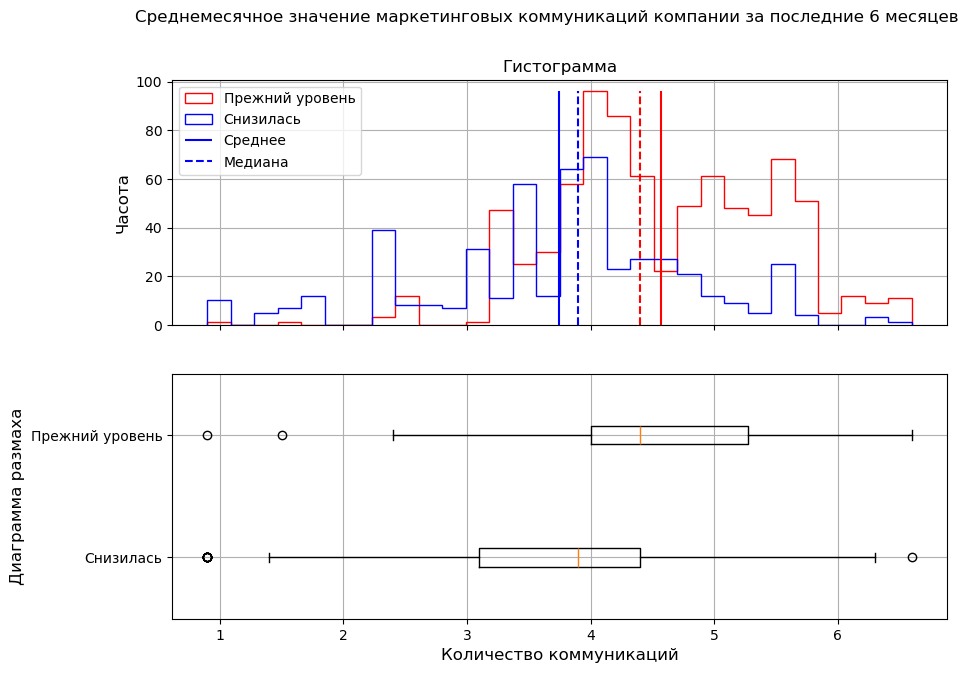

Покупательская активность снизилась 
 count    498.000000
mean       3.744378
std        1.053374
min        0.900000
25%        3.100000
50%        3.900000
75%        4.400000
max        6.600000
Name: Маркет_актив_6_мес, dtype: float64

Покупательская активность на прежнем уровне 
 count    802.000000
mean       4.570075
std        0.848618
min        0.900000
25%        4.000000
50%        4.400000
75%        5.275000
max        6.600000
Name: Маркет_актив_6_мес, dtype: float64


In [28]:
hist_box_plot2(
    data_market_file,
    'Маркет_актив_6_мес',
    bins=30, 
    title='Среднемесячное значение маркетинговых коммуникаций компании за последние 6 месяцев', 
    x_lable='Количество коммуникаций'
)

В среднем за последние пол года на одного клиента компании, активность которого не снизилась, приходилось 4,6 маркетинговых взаимодействия. На клиента со снизившейся активностью приходилось 3,7 взаимодействия. Явно видна разница между двумя группами покупатеелей.

#### Маркетинговая активность за текущий месяц

In [29]:
data_market_file['Маркет_актив_тек_мес'].unique()

array([5, 4, 3], dtype=int64)

В данном столбце всего 3 значения, поэтому для его визуализации используем столбчатую диаграмму.

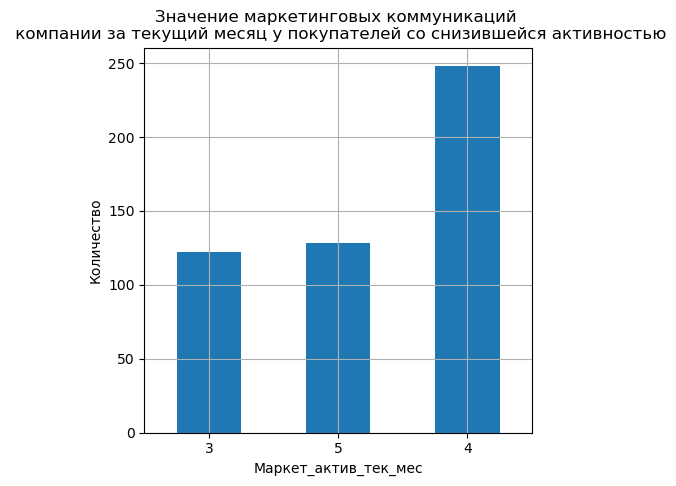

In [30]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Снизилась', 'Маркет_актив_тек_мес'],
    title='Значение маркетинговых коммуникаций \n компании за текущий месяц у покупателей со снизившейся активностью',
    x_label='Количество коммуникаций'
)

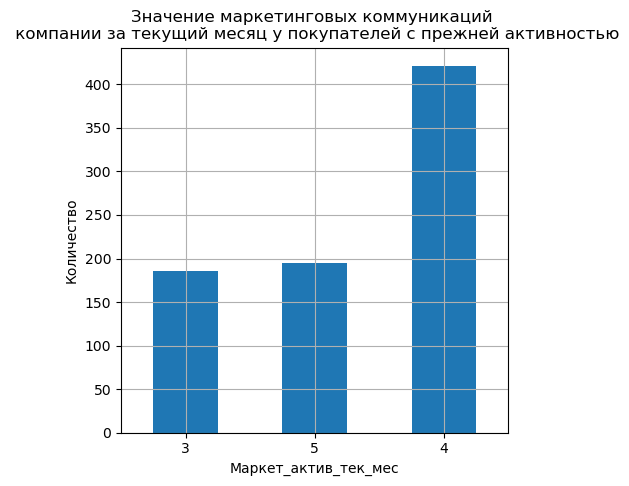

In [31]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Прежний уровень', 'Маркет_актив_тек_мес'],
    title='Значение маркетинговых коммуникаций \n компании за текущий месяц у покупателей с прежней активностью',
    x_label='Количество коммуникаций'
)

Количество маркетинговых активностей за текущий месяц для обоих групп покупателей имеет примерно одинаковое соотношение.

#### Количество дней с момента регистрации

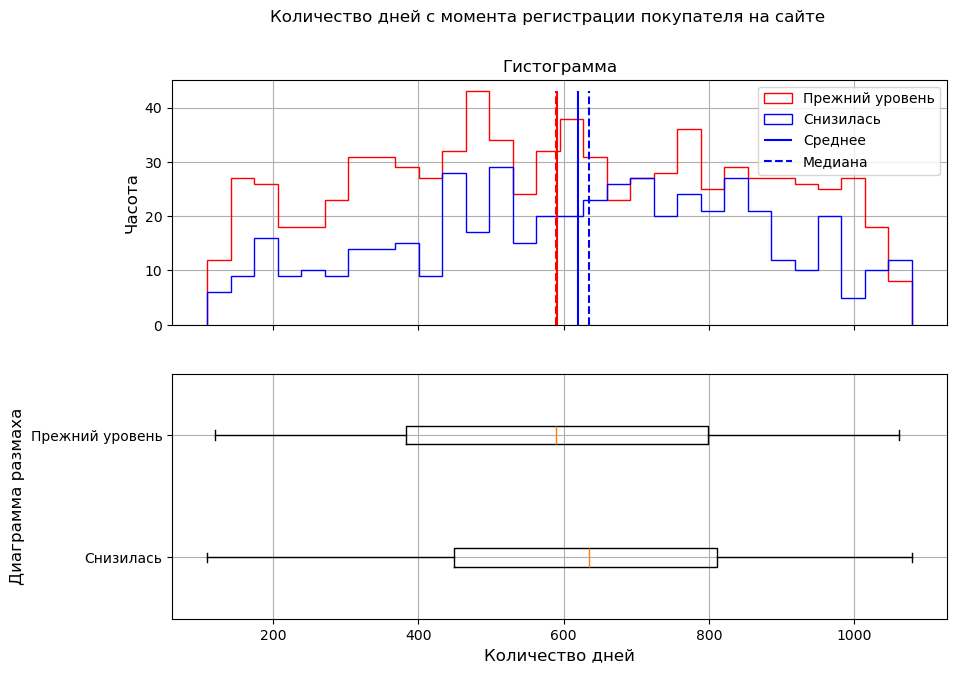

Покупательская активность снизилась 
 count     498.000000
mean      619.883534
std       239.940818
min       110.000000
25%       449.000000
50%       634.500000
75%       811.000000
max      1079.000000
Name: Длительность, dtype: float64

Покупательская активность на прежнем уровне 
 count     802.000000
mean      590.730673
std       255.330179
min       121.000000
25%       382.500000
50%       590.000000
75%       798.750000
max      1061.000000
Name: Длительность, dtype: float64


In [32]:
hist_box_plot2(
    data_market_file,
    'Длительность', 
    bins=30, 
    title='Количество дней с момента регистрации покупателя на сайте', 
    x_lable='Количество дней'
)

Самый "новый" пользователь зарегестрировался 110 дней назад. По этим данным видно, что данные даны по покупателям, которые пользуются сервисом от 3 месяцев до 3 лет. В целом особой разницы между группами покупателей с разой активностью нет.

#### Доля покупок по акции

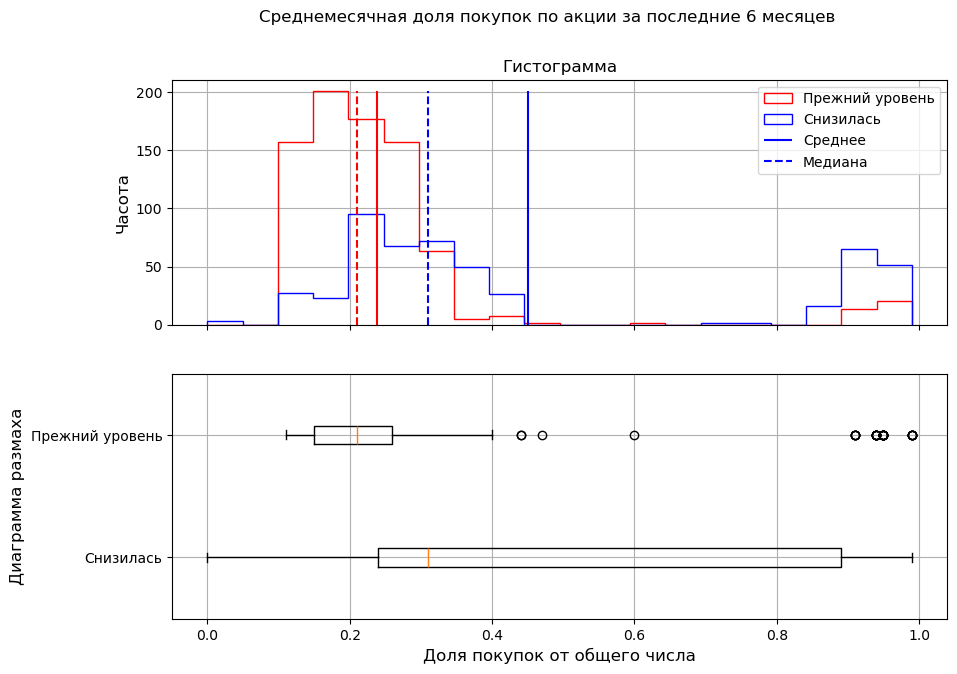

Покупательская активность снизилась 
 count    498.000000
mean       0.450964
std        0.306011
min        0.000000
25%        0.240000
50%        0.310000
75%        0.890000
max        0.990000
Name: Акционные_покупки, dtype: float64

Покупательская активность на прежнем уровне 
 count    802.000000
mean       0.238367
std        0.160599
min        0.110000
25%        0.150000
50%        0.210000
75%        0.260000
max        0.990000
Name: Акционные_покупки, dtype: float64


In [33]:
hist_box_plot2(
    data_market_file, 
    'Акционные_покупки', 
    bins=20, 
    title='Среднемесячная доля покупок по акции за последние 6 месяцев', 
    x_lable='Доля покупок от общего числа'
)


На графике можно выделить 2 группы покупателей. Первая группа рассредоточено вокруг медианного значения в 0,24, это обычные покупатели, которые берут товары, в меньшей степени ориентриуясь на акции. Вторая группа на графиках справа, это группа людей, у которой около 90% процентов покупок приходится на акционные товары.

Графики для покупателей с разной активностью очень сильно различаются. Доля покупателей, которые предпочитают покупки по акции, среди покупателей с прежним уровнем активности сильно меньше, чем у покупателей со снизившейся активностью. Средние значения доли акционных покупок различаются практически в 2 раза.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Абсолютно точно. Важное замечание.

#### Средний просмотр категорий за визит

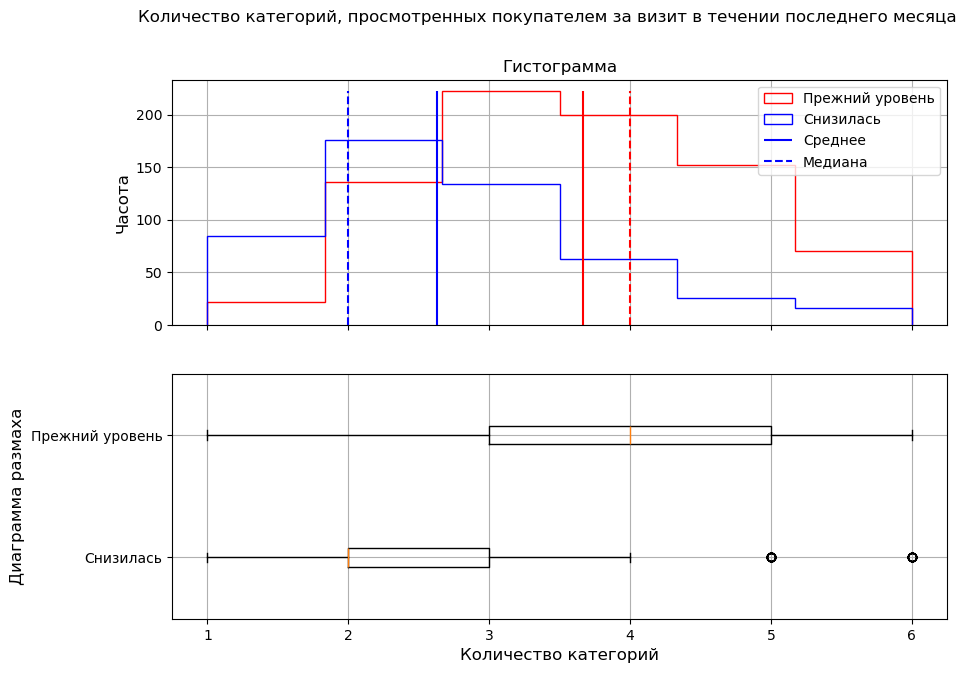

Покупательская активность снизилась 
 count    498.000000
mean       2.632530
std        1.229871
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

Покупательская активность на прежнем уровне 
 count    802.000000
mean       3.665835
std        1.277112
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


In [34]:
hist_box_plot2(
    data_market_file,
    'Средний_просмотр_категорий_за_визит', 
    bins=6, 
    title='Количество категорий, просмотренных покупателем за визит в течении последнего месяца', 
    x_lable='Количество категорий'
)

Количество просмотренных в среднем категорий за визит у покупателей со снизившейся и прежней активностью различаются. Если 50% покупателей с прежней активностью просматривают 3-5 категорий за визит, то у покупателей со снизившейся активностью этот показатель всего составляет всего 2-3 категории.

#### Неоплаченные продукты штук квартал

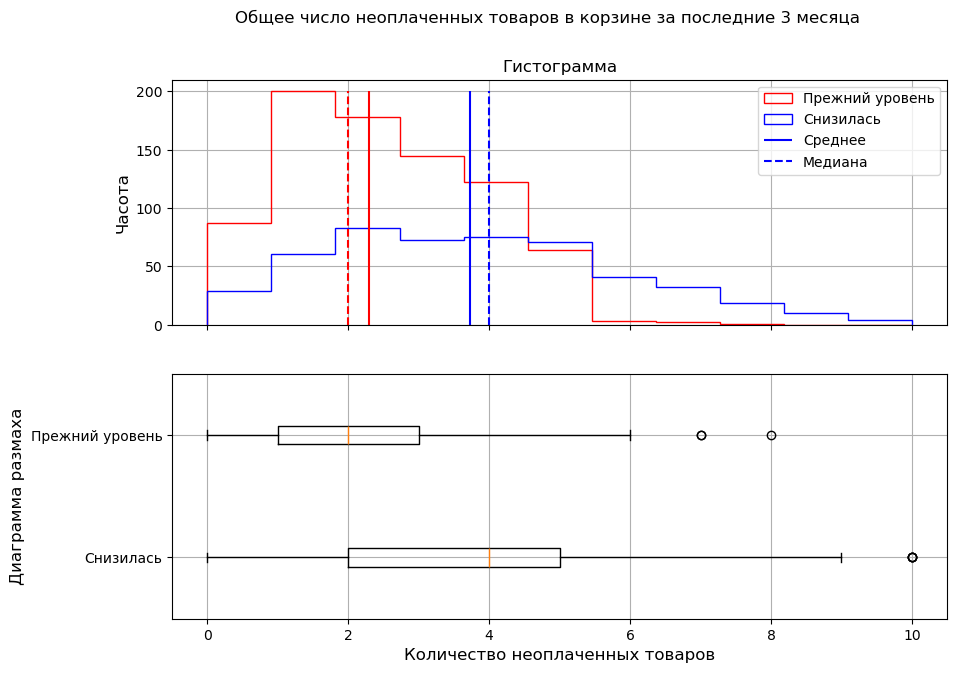

Покупательская активность снизилась 
 count    498.000000
mean       3.720884
std        2.287312
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

Покупательская активность на прежнем уровне 
 count    802.000000
mean       2.293017
std        1.508255
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


In [35]:
hist_box_plot2(
    data_market_file,
    'Неоплаченные_продукты_штук_квартал', 
    bins=11, 
    title='Общее число неоплаченных товаров в корзине за последние 3 месяца', 
    x_lable='Количество неоплаченных товаров'
)

По количеству неоплаченных товаров в корзине тоже четко вижно разницу между покупателями с прежним уровнем активности и покупателями со снизившейся активностью.

#### Ошибка сервиса

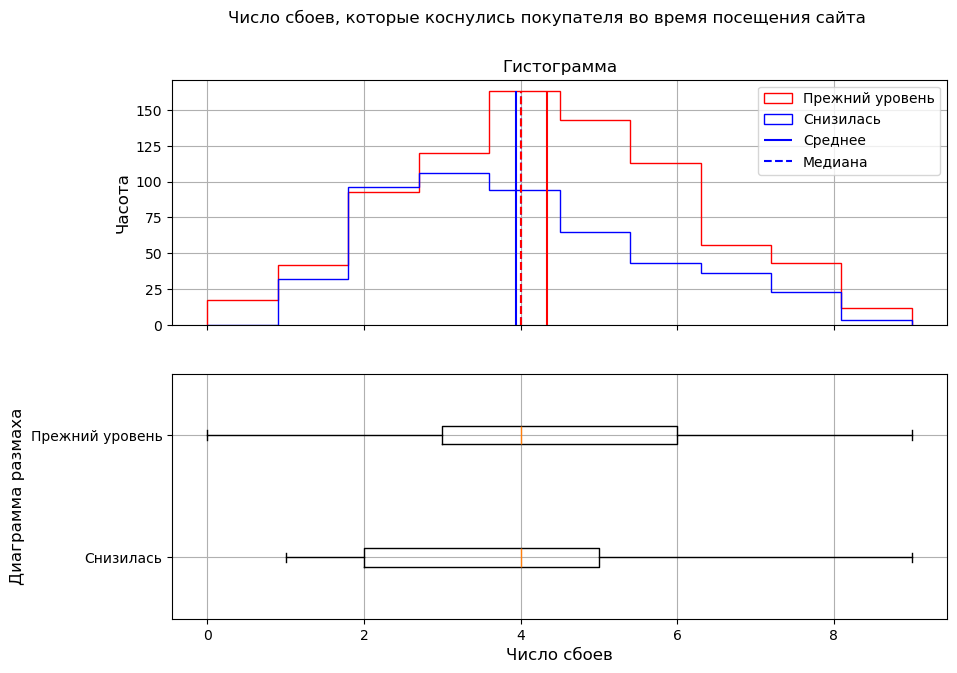

Покупательская активность снизилась 
 count    498.000000
mean       3.943775
std        1.892709
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: Ошибка_сервиса, dtype: float64

Покупательская активность на прежнем уровне 
 count    802.000000
mean       4.335411
std        1.979538
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: Ошибка_сервиса, dtype: float64


In [36]:
hist_box_plot2(
    data_market_file,
    'Ошибка_сервиса', 
    bins=10, 
    title='Число сбоев, которые коснулись покупателя во время посещения сайта', 
    x_lable='Число сбоев'
)

Пользователи сталкивались вплоть до 9 ошибок во время посещений сайта. Само распределение ошибок является нормальным со средним в 4,2 ошибки на пользователя. Разницы между группами покупателей нет, что и ожидалось.

#### Страниц за визит

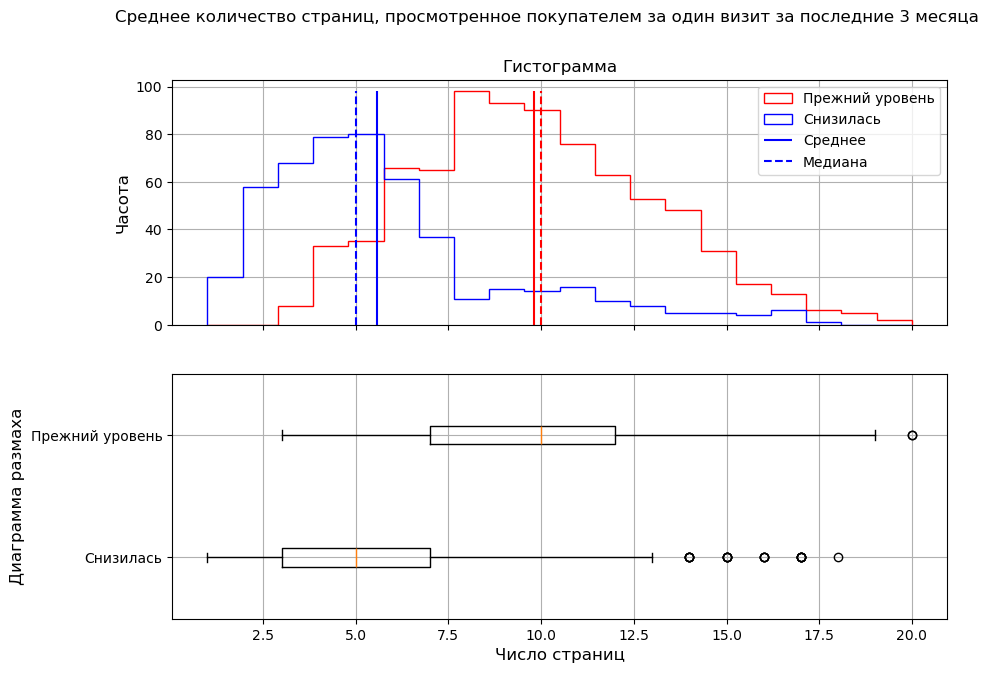

Покупательская активность снизилась 
 count    498.000000
mean       5.568273
std        3.454265
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       18.000000
Name: Страниц_за_визит, dtype: float64

Покупательская активность на прежнем уровне 
 count    802.000000
mean       9.796758
std        3.376846
min        3.000000
25%        7.000000
50%       10.000000
75%       12.000000
max       20.000000
Name: Страниц_за_визит, dtype: float64


In [37]:
hist_box_plot2(
    data_market_file,
    'Страниц_за_визит', 
    bins=20, 
    title='Среднее количество страниц, просмотренное покупателем за один визит за последние 3 месяца', 
    x_lable='Число страниц'
)

Покупатели со снизившейся активностью просматривают за один визит вдвое меньше страниц, чем покупатели с прежним уровнем активности.

### Анализ категориальных признаков data_market_file

#### Покупательская активность

Покупательская активность - целевой признак, который необходимо предсказать в рамках данной работы.

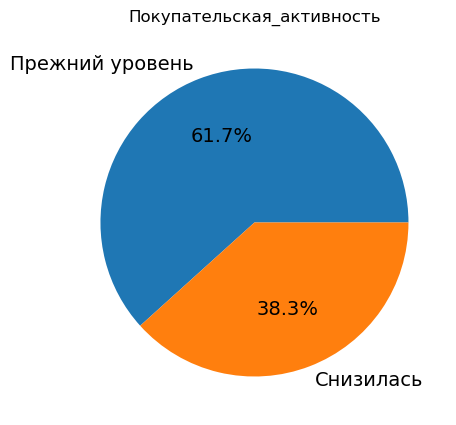

In [38]:
cat_plot(
    data_market_file['Покупательская_активность'],
    title='Покупательская_активность',
)

Почти 40% пользователей сервиса снизили свою покупательскую активность. Явно видно, что у сервиса есть проблемы.

#### Тип сервиса

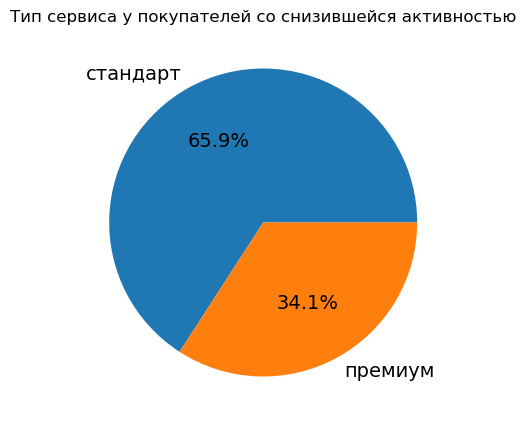

In [39]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Снизилась', 'Тип_сервиса'],
    title='Тип сервиса у покупателей со снизившейся активностью',
)

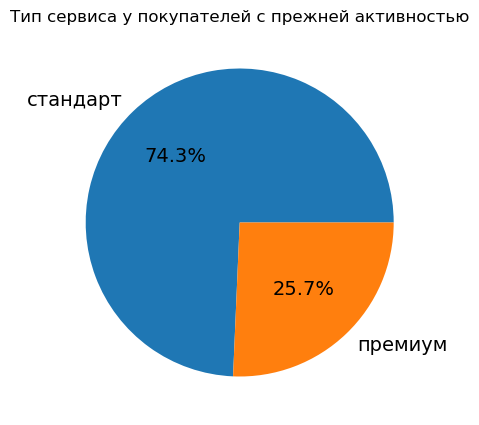

In [40]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Прежний уровень', 'Тип_сервиса'],
    title='Тип сервиса у покупателей с прежней активностью',
)

Доля премиум клиентов среди покупателей, у которых активность снизилась, немного больше, 34% против 25,7%. Бизнесу нужно больше уделять внимания премиум клиентам.

#### Разрешить сообщать

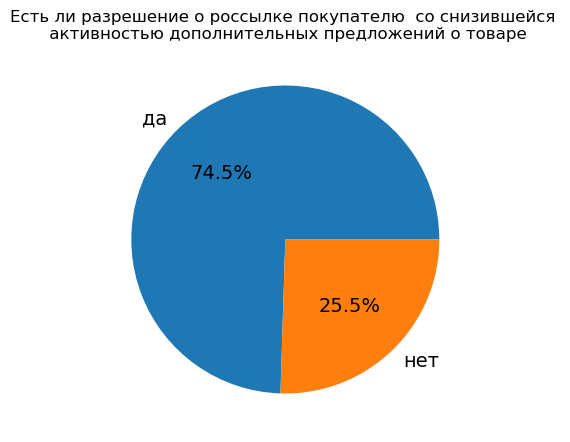

In [41]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Снизилась', 'Разрешить_сообщать'],
    title='Есть ли разрешение о россылке покупателю  со снизившейся \n активностью дополнительных предложений о товаре',
)

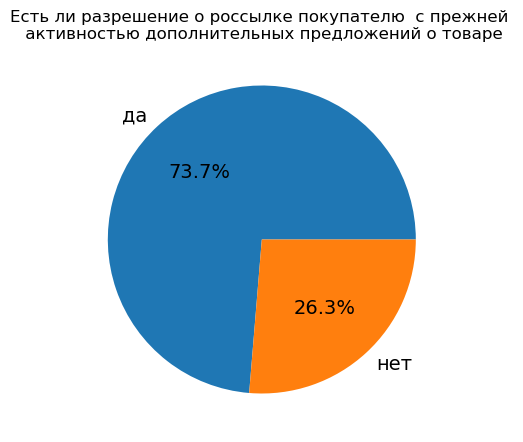

In [42]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Прежний уровень', 'Разрешить_сообщать'],
    title='Есть ли разрешение о россылке покупателю  с прежней \n активностью дополнительных предложений о товаре',
)

Разницы между двумя категориями покупателей нет.

#### Популярная категория

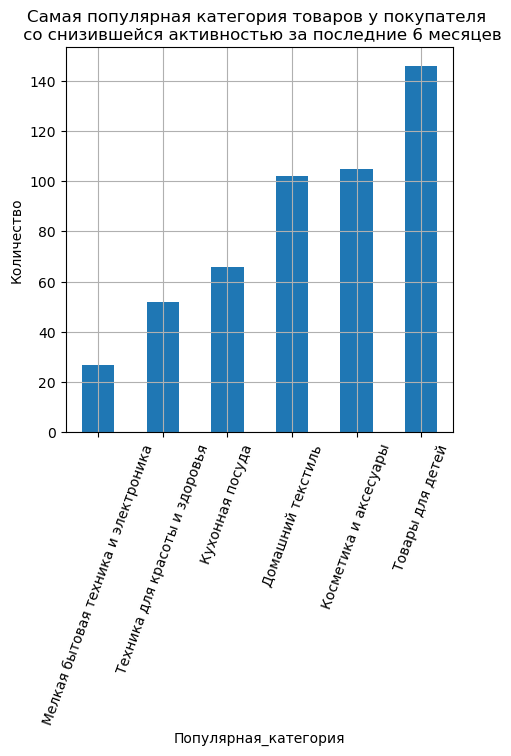

In [43]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Снизилась','Популярная_категория'],
    title='Самая популярная категория товаров у покупателя \n со снизившейся активностью за последние 6 месяцев',
    rot=70,
)

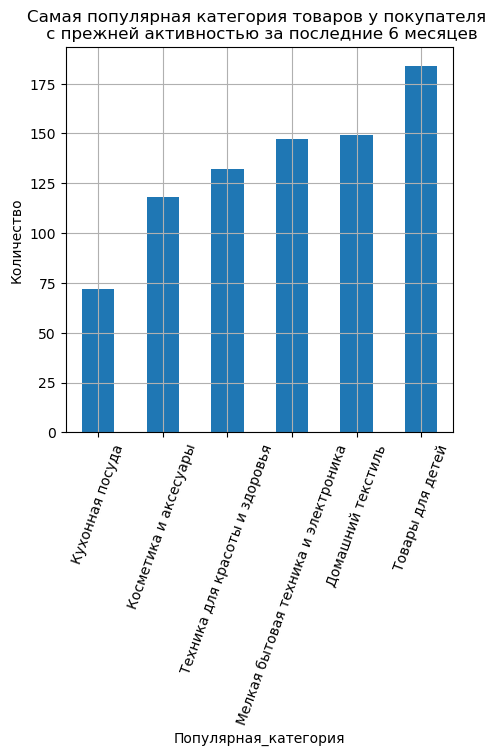

In [44]:
cat_plot(
    data_market_file.loc[data_market_file['Покупательская_активность'] == 'Прежний уровень','Популярная_категория'],
    title='Самая популярная категория товаров у покупателя \n с прежней активностью за последние 6 месяцев',
    rot=70,
)

Покупательские привычки у двух категорий покупателей немного различаются.

### Анализ количественных признаков data_market_money

In [45]:
show_info(data_market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

#### Выручка

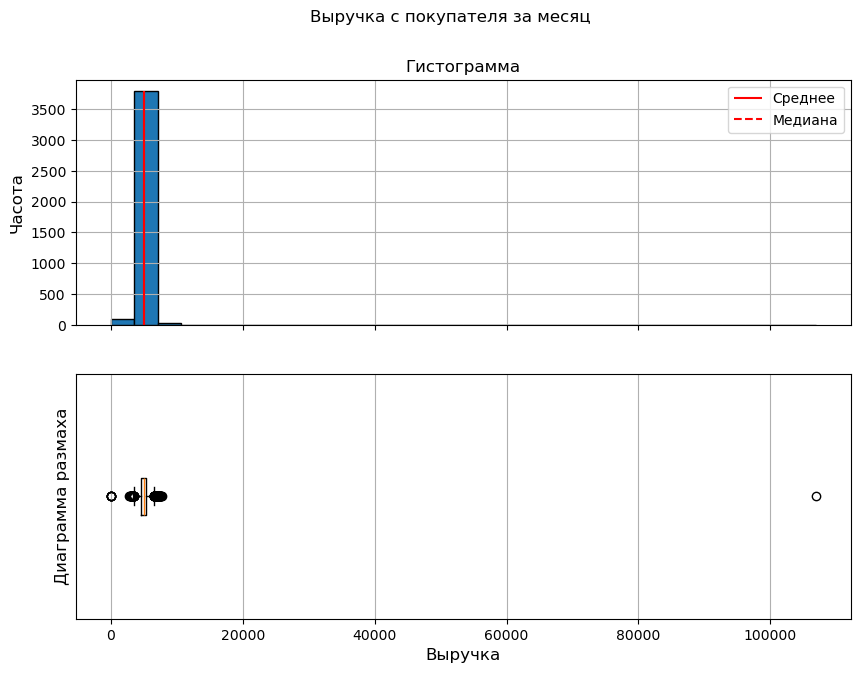

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64


In [46]:
hist_box_plot(
    data_market_money['Выручка'], 
    bins=30, 
    title='Выручка с покупателя за месяц', 
    x_lable='Выручка'
)

На графиках видно аномальное значение, которое превышает 100000. Посмотрим на него.

In [47]:
data_market_money.loc[data_market_money['Выручка'] > 20000]

id         Период   Выручка
98  215380  текущий_месяц  106862.2

Один покупатель, который потратил 107 тысяч на покупки в этом месяце. Посмотрим на его активность в другие периоды.

In [48]:
data_market_money.loc[data_market_money['id'] == 215380]

id               Период   Выручка
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

Посмотрим на общую выручку от этого покупателя.

In [49]:
data_money.loc[data_money['id'] == 215380]

id  Прибыль
32  215380     3.88

In [50]:
data_market_file.loc[data_market_file['id'] == 215380]

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
32  215380                 Снизилась     премиум                нет   

    Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
32                 1.7                     4           637               0.94   

              Популярная_категория  Средний_просмотр_категорий_за_визит  \
32  Техника для красоты и здоровья                                    3   

    Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
32                                   2               4                 7

Не похоже, что это аномальное значение правдиво. Заменим его средним значеним и заного пострим графики.

In [51]:
data_market_money.loc[data_market_money['id'] == 215380, 'Выручка'] = data_market_money['Выручка'].mean()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь, возможно, будет точнее заменить значением предыдущего периода для этого же пользователя.

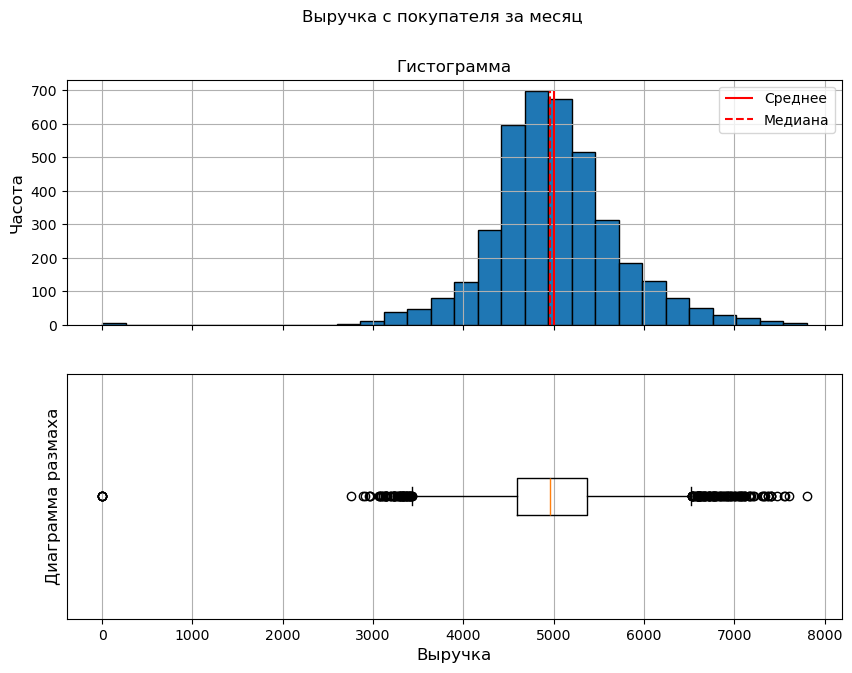

count    3900.000000
mean     4999.308074
std       706.698435
min         0.000000
25%      4590.150000
50%      4957.500000
75%      5362.625000
max      7799.400000
Name: Выручка, dtype: float64


In [52]:
hist_box_plot(
    data_market_money['Выручка'], 
    bins=30, 
    title='Выручка с покупателя за месяц', 
    x_lable='Выручка'
)

В среднем один покупатель приносит 5000 рублей выручки.

### Анализ категориальных признаков признаков data_market_money

#### Период

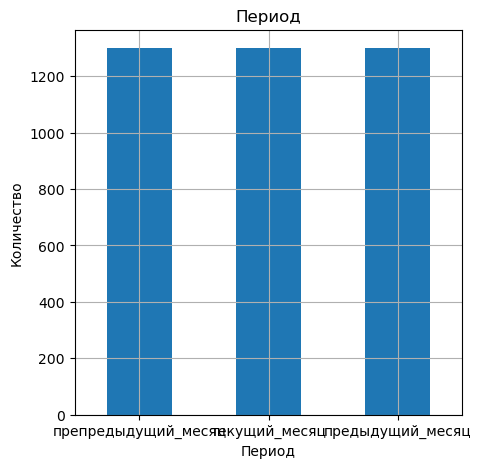

In [53]:
cat_plot(
    data_market_money['Период'],
    title='Период',
)

О каждом пользователе есть записи в датасете за 3 месяца. Данные соответствуют ожиданиям.

### Средняя выручка за период

Интересно посмотреть, как менялась средняя выручка от покупателей в зависимости от месяца.

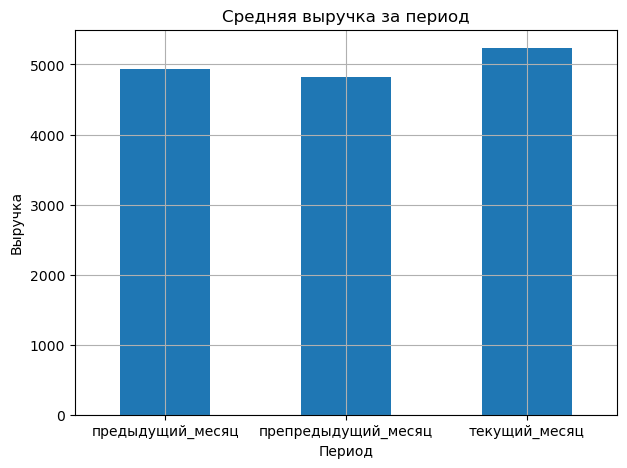

In [54]:
data_market_money.pivot_table(values='Выручка', index='Период', aggfunc='mean').plot(
    kind='bar',
    ylabel='Выручка',
    title='Средняя выручка за период',
    legend=False,
    figsize=(7, 5),
    grid=True,
    rot=0
)
plt.show()

Средняя выручка росла в каждом месяце, это хороший знак.

### Анализ количественных признаков data_market_time

In [55]:
show_info(data_market_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдущий_месяц     12
4  215350     текущий_месяц     13

#### Минут

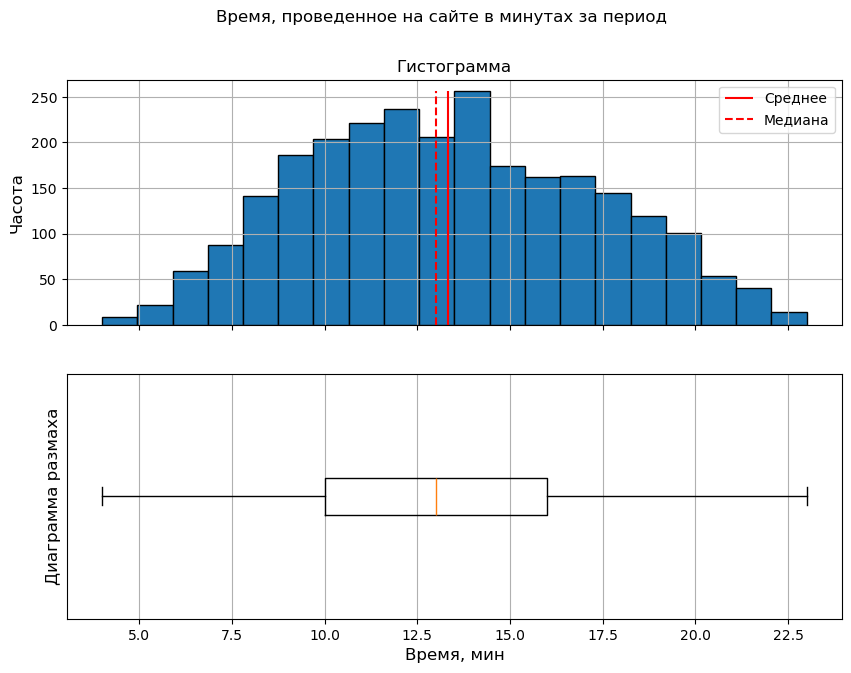

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


In [56]:
hist_box_plot(
    data_market_time['минут'], 
    bins=20, 
    title='Время, проведенное на сайте в минутах за период', 
    x_lable='Время, мин'
)

В среднем покупатель прводил на сайте 13 минут. Аномалий в данных нет.

### Анализ категориальных признаков признаков data_market_time

#### Период

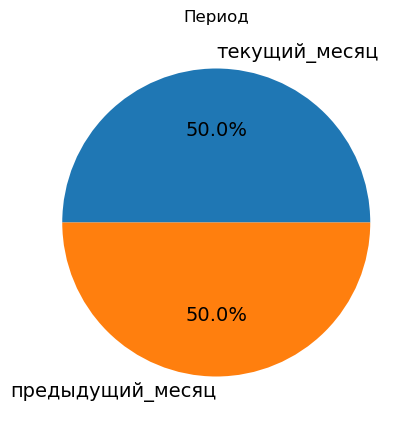

In [57]:
cat_plot(
    data_market_time['Период'],
    title='Период',
)

Для каждого покупателя есть данные за прошлый и текущий месяц, как и ожидалось.

### Анализ количественных признаков data_money

#### Прибыль

In [58]:
show_info(data_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

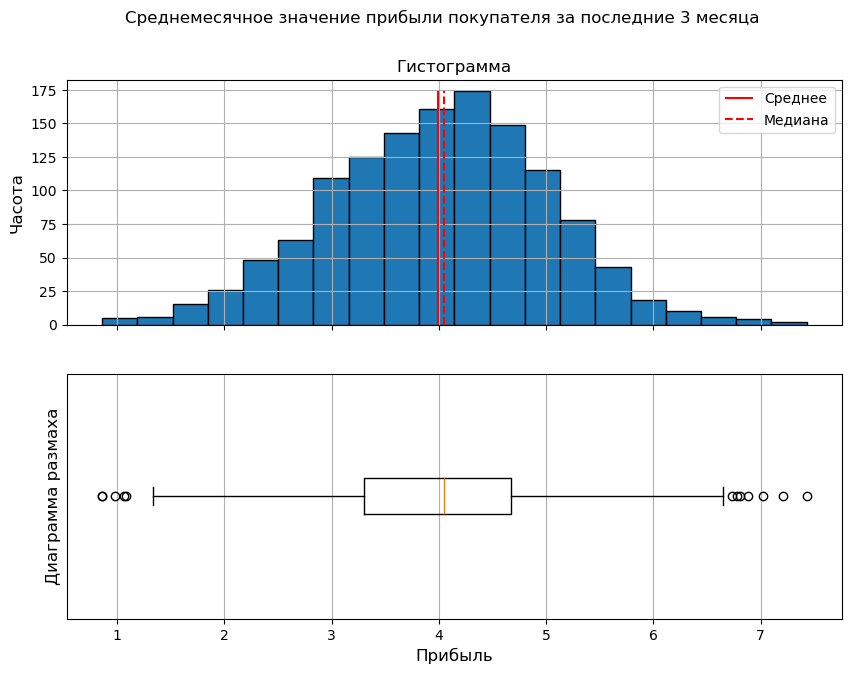

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64


In [59]:
hist_box_plot(
    data_money['Прибыль'], 
    bins=20, 
    title='Среднемесячное значение прибыли покупателя за последние 3 месяца', 
    x_lable='Прибыль'
)

Судя по данным прибыль в данном датасете считается в тысячах рублей. В среднем пользователь приносит 4 тысячи рублей прибыли в месяц. Распередление явно выглядит как нормальное, аномальных значений в данных нет.

### Вывод

В результате исследовательского анализа можно сделать следующие выводы:

Покупатели со снизившнейся активностью, относительно покупателей с прежним уровнем:
- Получают меньше маркетинговых взаимодействий с сайтом;
- Имеют большую болю покупок по акции;
- В среднем просматривают меньше категорий за визит;
- Имеют большее число неоплаченных товаров в корзине;
- Просматривают меньше страниц за визит;
- Имеют немного большую долю премиум пользователей;
- Имеют немного другие популярные категории.

## Объединение таблиц

Объединим в одну таблицу датасеты data_market_file, data_market_money и data_market_time. В последних двух датасетах содержится информация за определенные периоды, выделим каждый период в этих датасетах в отдельный столбец.

In [60]:
data_market = data_market_file.copy()

In [61]:
for period in data_market_money['Период'].unique():
    data_market = data_market.merge(
        data_market_money.loc[data_market_money['Период'] == period, ['id', 'Выручка']],
        on='id',
        suffixes=['', '_' + period]
    )

In [62]:
for period in data_market_time['Период'].unique():
    data_market = data_market.merge(
        data_market_time.loc[data_market_time['Период'] == period, ['id', 'минут']],
        on='id',
        suffixes=['', '_' + period]
    )

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 

Здесь неоптимально объединяем таблицы. Есть способ, как в 4-5 строк и отфильтровать активных пользователей, и все объединить. 
    
Используем сводные таблицы, развернув наши таблицы с периодами так, чтобы в строках остались уникальные id, а в столбцах были периоды. Дальше просто отбираем строки, где ни в одном из столбцов нет нулей, после чего просто парой строк объединяем наши три таблицы - они уже все в готовом для этого формате.

</div>


In [63]:
show_info(data_market)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   2               1                 5   
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   

   Выручка  Выручка_текущий_месяц  Выручка_предыдущий_месяц  минут  \
0      0.0                 3293.1                       0.0     14   
1   4472.0                 4971.6                    5216.0     10   
2   4826.0                 5058.4                    5457.5     13   
3   4793.0                 6610.4                    6158.0     13   
4   4594.0                 5872.5                    5807.5     11   

   минут_предыдущий_месяц  
0                      13  
1                      12  
2                       8  
3                      11  
4                       8

In [64]:
data_market = data_market.rename(columns={'Выручка':'Выручка_препредыдущий_месяц', 'минут':'минут_текущий_месяц'})

In [65]:
show_info(data_market)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   2               1                 5   
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   

   Выручка_препредыдущий_месяц  Выручка_текущий_месяц  \
0                          0.0                 3293.1   
1                       4472.0                 4971.6   
2                       4826.0                 5058.4   
3                       4793.0                 6610.4   
4                       4594.0                 5872.5   

   Выручка_предыдущий_месяц  минут_текущий_месяц  минут_предыдущий_месяц  
0                       0.0                   14                      13  
1                    5216.0                   10                      12  
2                    5457.5                   13                       8  
3                    6158.0                   13                      11  
4                    5807.5                   11                       8

Отберем покупателей, которые что-либо покупали в предыдущие 3 месяца.

In [66]:
data_market = data_market.loc[
    (data_market['Выручка_препредыдущий_месяц'] > 0) &
    (data_market['Выручка_предыдущий_месяц'] > 0) &
    (data_market['Выручка_текущий_месяц'] > 0)
].copy()

In [67]:
show_info(data_market)

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   Покупательская_активность            1297 non-null   object 
 2   Тип_сервиса                          1297 non-null   object 
 3   Разрешить_сообщать                   1297 non-null   object 
 4   Маркет_актив_6_мес                   1297 non-null   float64
 5   Маркет_актив_тек_мес                 1297 non-null   int64  
 6   Длительность                         1297 non-null   int64  
 7   Акционные_покупки                    1297 non-null   float64
 8   Популярная_категория                 1297 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  Ошибка_сервиса                     

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   
5  215353                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   
5    Домашний текстиль                                    4   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   
5                                   1               1                 4   

   Выручка_препредыдущий_месяц  Выручка_текущий_месяц  \
1                       4472.0                 4971.6   
2                       4826.0                 5058.4   
3                       4793.0                 6610.4   
4                       4594.0                 5872.5   
5                       5124.0                 5388.5   

   Выручка_предыдущий_месяц  минут_текущий_месяц  минут_предыдущий_месяц  
1                    5216.0                   10                      12  
2                    5457.5                   13                       8  
3                    6158.0                   13                      11  
4                    5807.5                   11                       8  
5                    4738.5                   10                      10

### Вывод

Таблицы успешно объединены и отобраны покупатели, которые что-либо покупали за последние 3 месяца.


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
По проекту нам важно анализировать и использовать в моделях данные о покупателях, которые делали хотя бы одну покупку, но в каждый из трех месяцев:
    
`Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.`
    
Важно удалить таких пользователей.

</div>
  

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Исследовательский анализ мы делаем для того, чтобы понять, какие закономерности заложены в наших данных. Здесь важно посмотреть на распределения признаков в разрезе целевого признака (снижения активности). 
    
Можно построить и наложить друг на друга гистограммы по данным в подвыборках с и без снижения активности. Можно расположить рядом два боксплота, для категориальных данных − две диаграммы.
    
Думаю, так мы увидим гораздо больше интересной информации. Она нам особенно пригодится для части с исследованием сегмента покупателей.

***
    
По итогам исследовательского анализа (кроме красивой таблицы) у нас должен быть вывод с портретом покупателя, который снижает активность: какие значения каких признаков для него будут характерны. Сколько страниц он в среднем просматривает, больше или меньше это, чем у активных пользователей, также с акционными покупками, временем на сайте и другими признаками. 
    
Фактически основной костяк выводов проекта делаем уже здесь. Модель нам нужна для перевода категориального признака (факт снижения активности) в вероятностный (вероятность снижения), чтобы дальше чуть более пластично исследовать выбранный сегмент.

       
</div> 

<br/>
<div class="alert alert-info">
Поменял графики в анализе и добавид вывод в конец исследовательского анализа.
</div>

## Корреляционный анализ

### Матрицы корреляции и диаграмм рассеяния

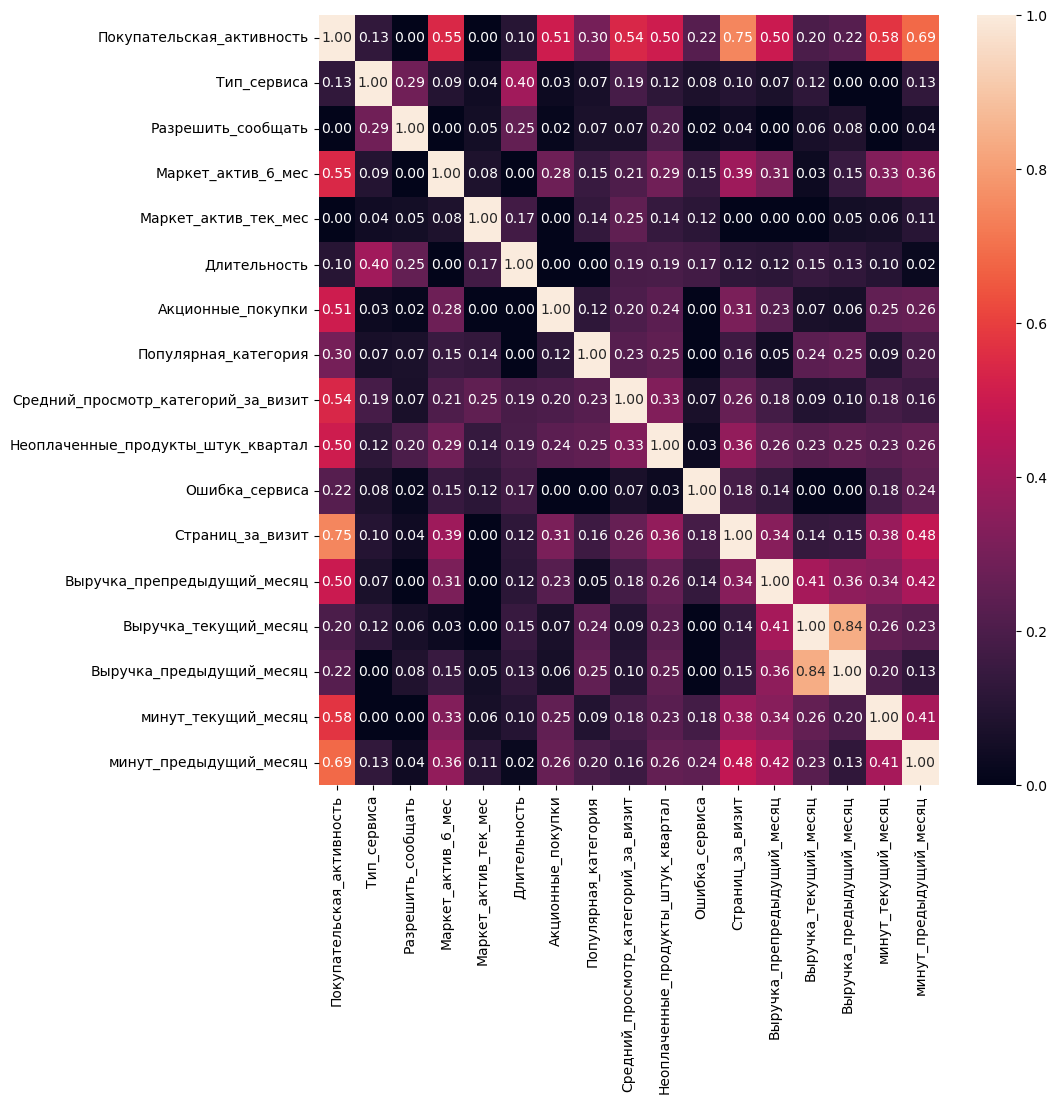

In [68]:
fig = sns.heatmap(data_market.drop('id', axis='columns').phik_matrix(
    interval_cols=data_market.drop('id', axis='columns').select_dtypes(include='number').columns), 
    annot=True, 
    fmt='.2f')
fig.figure.set_size_inches(10, 10)

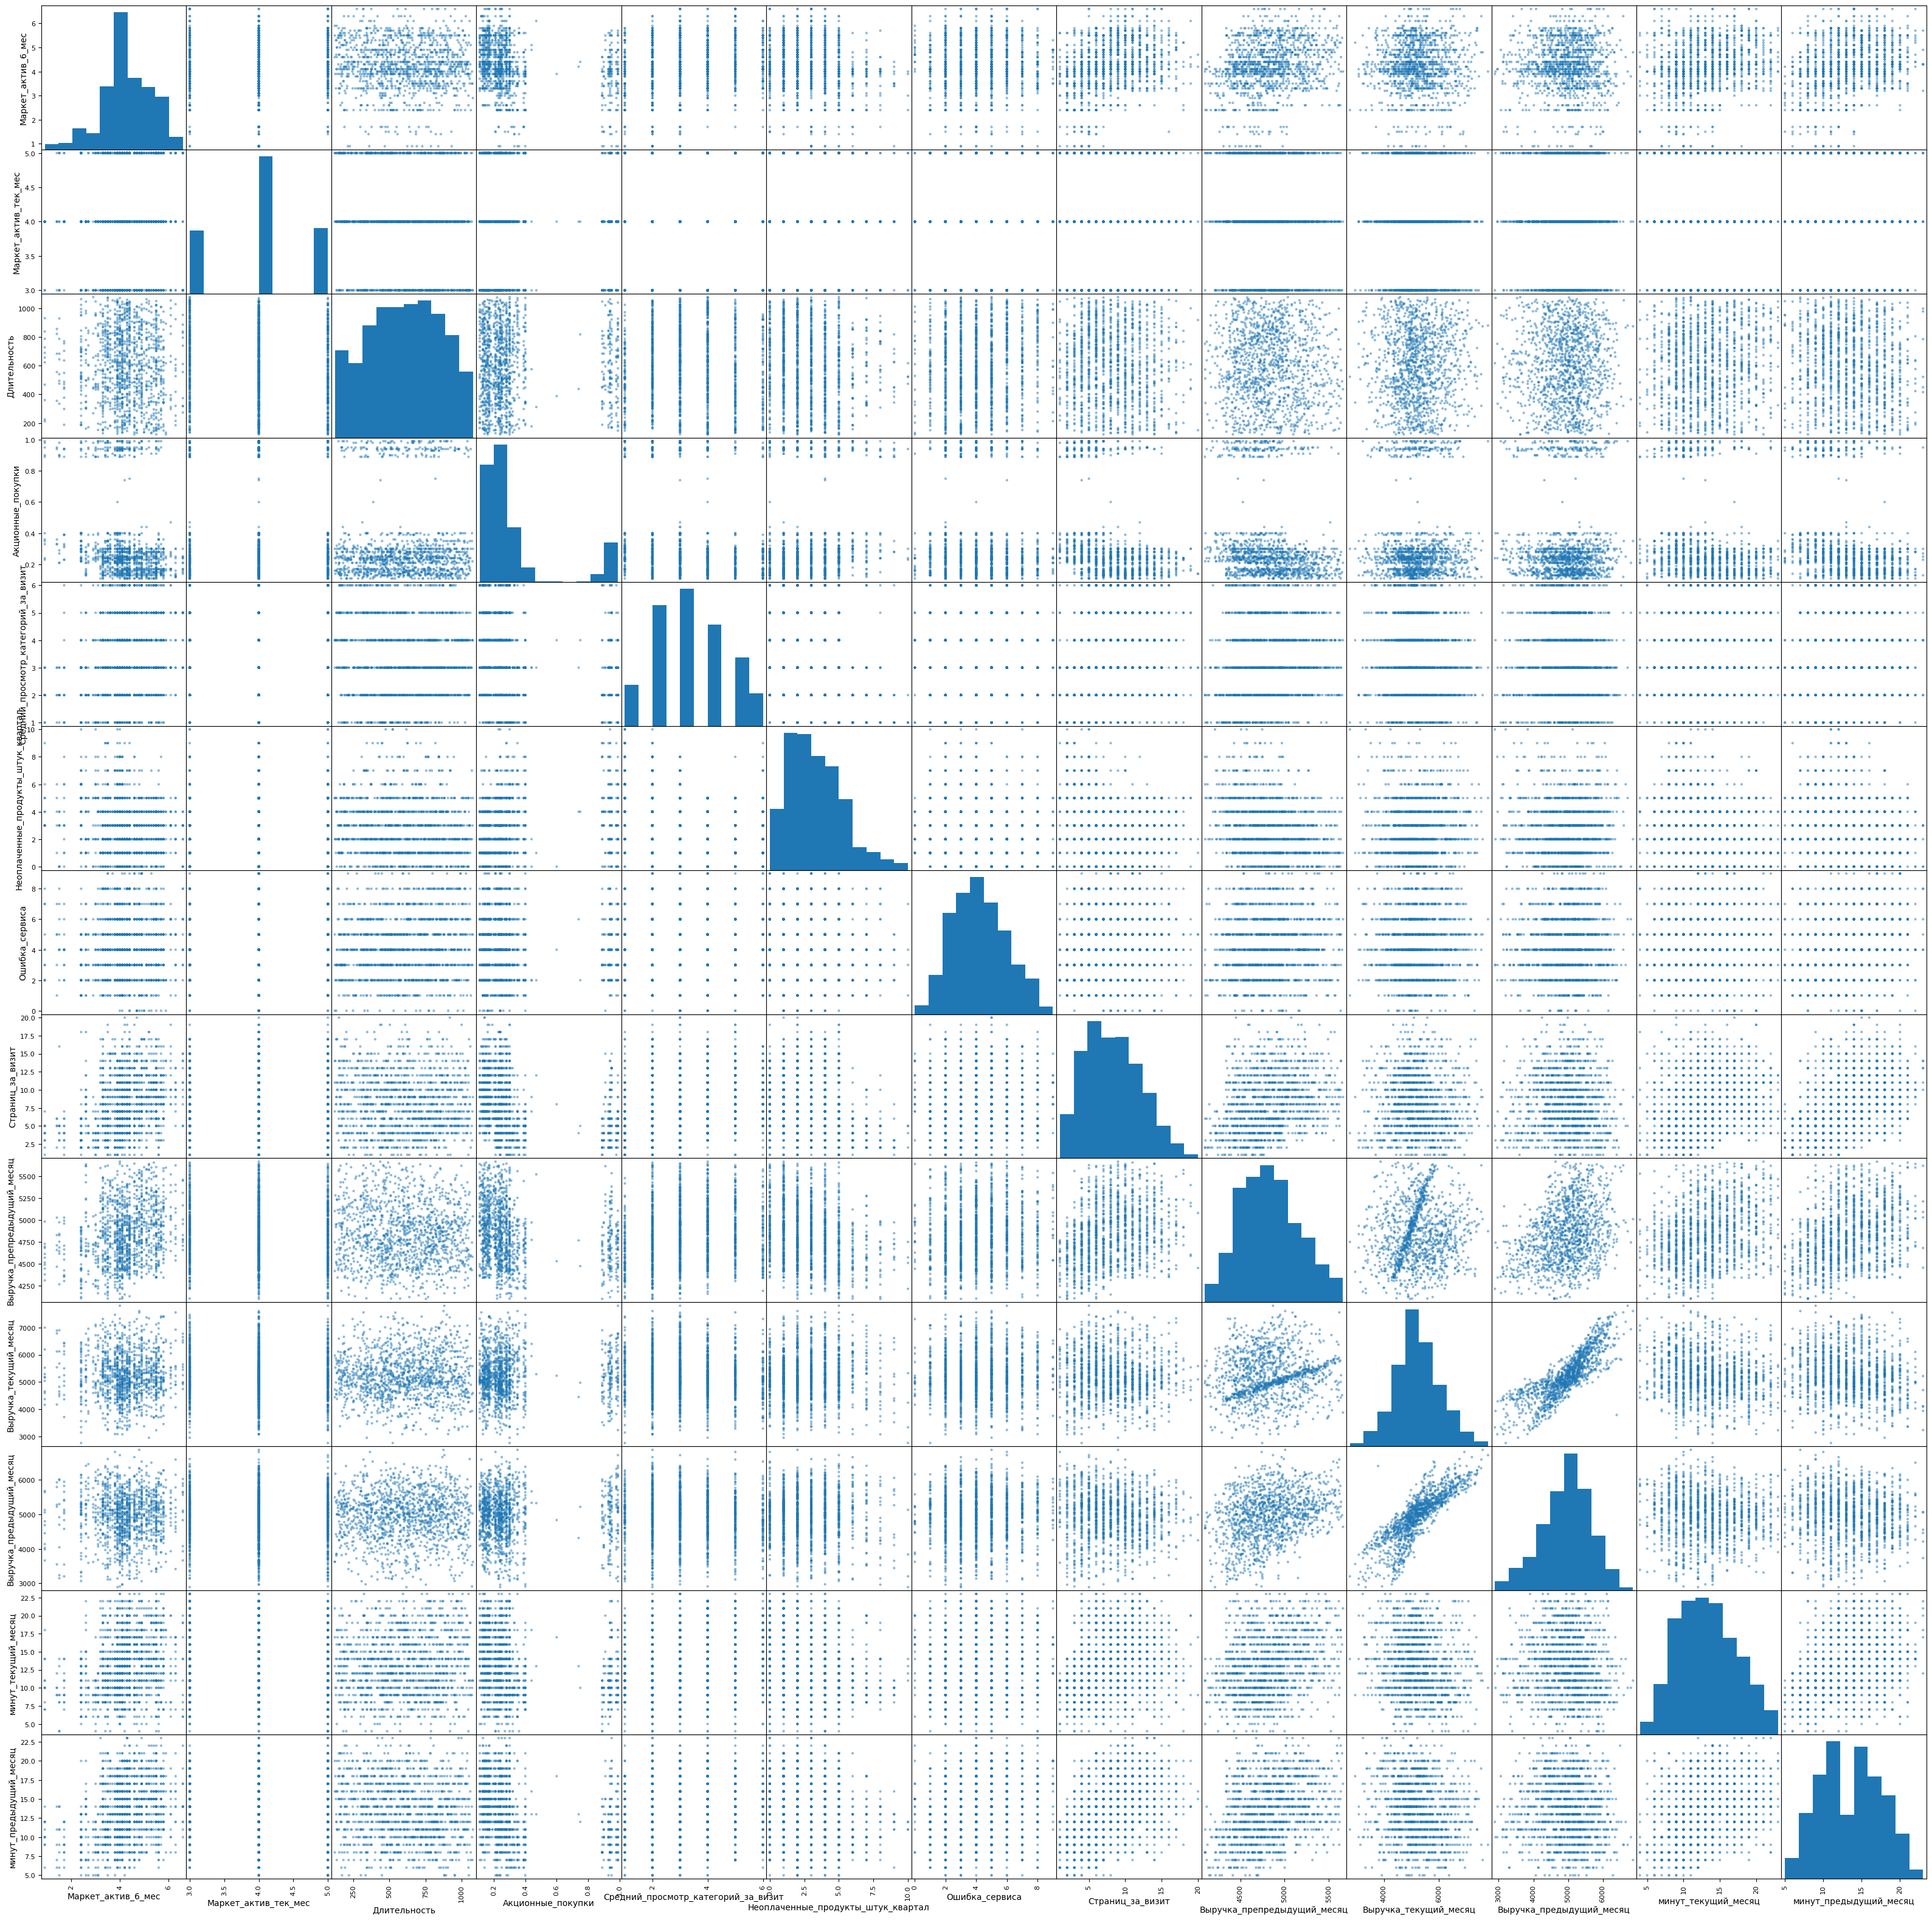

In [69]:
pd.plotting.scatter_matrix(data_market.drop('id', axis='columns'), figsize=(40, 40))
plt.show()

#### Вывод

Между признаками нет корреляции, превышающей 0,75. Соответственно можно говорит о том, что в признаках нет какой-либо мультиколлинеарности. Для обучения модели подходят все признаки, наименее полезные признаки будут убраны из обучения модели потом, в ходе анализа важности признаков.

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен
</div>  

## Пайплайн

Разобьем данные на тренирововчную и тестовую выборки.

In [70]:
RANDOM_STATE = 113
TEST_SIZE = 0.25

Закодируем целевой признак, где 1 будет говорить о снизившейся покупательской активности.

In [71]:
data_market['Покупательская_активность'] = data_market['Покупательская_активность'].apply(
    lambda x: 1 if x=='Снизилась' else 0)

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично.
</div>  

In [72]:
data_market = data_market.rename(
    columns={'Покупательская_активность': 'Покупательская_активность_снизилась'}
)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    data_market.drop(['id', 'Покупательская_активность_снизилась'], axis='columns'),
    data_market['Покупательская_активность_снизилась'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=data_market['Покупательская_активность_снизилась']
)

Разобьем столбцы по категориям, для последующего кодирования.

In [74]:
ohe_columns = [
    'Тип_сервиса',
    'Разрешить_сообщать'    
]
ord_columns = [
    'Популярная_категория'
]
num_columns = [
    'Маркет_актив_6_мес',
    'Маркет_актив_тек_мес',
    'Длительность',
    'Акционные_покупки',
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит',
    'Выручка_препредыдущий_месяц',
    'Выручка_текущий_месяц',
    'Выручка_предыдущий_месяц',
    'минут_текущий_месяц',
    'минут_предыдущий_месяц'
]

In [75]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore',
                          sparse_output=False)
        )
    ]
)

In [76]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [77]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [78]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
]) 

In [79]:
param_grid = [

    # словарь параметров модели KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'models__leaf_size': range(2, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },

    # словарь параметров  для DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__max_features': range(2, 17),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь параметров для модели SVC
    {
        'models': [SVC(random_state=RANDOM_STATE, cache_size=10000, probability=True)],
        'models__kernel': ['rbf', 'linear', 'poly'],
        'models__C': range(1, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь параметров для модели LogisticRegression
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что используешь `remainder='passthrough'` . Хороший выбор гиперпараметров и значений для подбора. Отлично, что пробуем два типа масштабирования.
</div> 



Запустим поиск лучшей модели для поставленной задачи. В качестве метрики выберем ROC-AUC. Эта метрика отражает отношение TPR к FPR, тем самым лучшей будет модель, которая чаще верно предсказывает значение класса 1 и реже присваивает класс 1 классу 0.

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ок. Аргументация по метрике принимается..
    
Конркетно в нашей задаче нам важно лишь то, что эта метрика учитывает и полноту, и точность комплексно, а не по отдельности.
    
Дисбаланс классов у нас небольшой, порог нам подбирать не нужно, поэтому в целом подошли бы и остальные комплексные метрики : f1, accuracy.
</div>  

In [80]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

C:\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Тип_сервиса',
                                                                          'Разрешить_сообщать']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simp...
                          'models__C': range(1, 3),
                          'models__kernel': ['rbf', 'linear', 'poly'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(penalty='l1',
                                                        random_state=113,
                                                        solver='liblinear')],
                          'models__C': range(1, 8),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [81]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип_сервиса',
                                                   'Разрешить_сообщать']),
                                                 ('ord',
                                          

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере была неточность. Строго говоря, выше выводишь качество не на тренировочной выборке (это когда на чем обучились, на том и предсказали), а на кросс-валидации. Внутри кросс-валидации у нас есть разделение на сплиты, часть из них (тренировочный сплит) участвует в обучении, тестовый (или валидационный) - в обучении не участвует, на нем мы оцениваем качество и подбираем гиперпараметры. Это все скрыто от нас внутри функции, но в итоге мы получаем некоторую приближенную к объективной оценку.
    
Если же обучить модель на тренировочной выборке, а затем на ней же предсказать качество, то оно будет близко к 100%. Иногда такую оценку на тренировочной выборке используют для того, чтобы проверить, что модель вообще обучается. 
        
</div> 


<br/>
<div class="alert alert-info">
Не очень понимаю замечение. Я имею ввиду, что выше для метрики используется тренировочная выборка, а ниже уже используется тестовая.   
</div>

In [82]:
y_test_pred = grid_search.predict_proba(X_test)[:, 1]

In [83]:
roc_auc_model = roc_auc_score(y_test, y_test_pred)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_model}')

Метрика ROC-AUC на тестовой выборке: 0.8972476328037233


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
     
roc_auc нужно считать по вероятностям классов. 
    
`probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))`

Самое подробное объяснение метрики, что я видел на русском языке, можно посмотреть здесь: https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ 


</div>

<br/>
<div class="alert alert-info">
Поменял расчет ROC-AUC, обновил строку ниже.
</div>

Лучшая модель показывает метрику ROC-AUC 0.91 на тренировочной выборке и 0.917 на тестовой.

In [84]:
result = pd.DataFrame(grid_search.cv_results_)
result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(10)

rank_test_score                                       param_models  \
3684                1  SVC(cache_size=10000, probability=True, random...   
3672                2  SVC(cache_size=10000, probability=True, random...   
753                 3                             KNeighborsClassifier()   
2157                3                             KNeighborsClassifier()   
2103                3                             KNeighborsClassifier()   
159                 3                             KNeighborsClassifier()   
1131                3                             KNeighborsClassifier()   
1563                3                             KNeighborsClassifier()   
483                 3                             KNeighborsClassifier()   
429                 3                             KNeighborsClassifier()   

      mean_test_score                                             params  
3684         0.923052  {'models': SVC(cache_size=10000, probability=T...  
3672         0.922512  {'models': SVC(cache_size=10000, probability=T...  
753          0.918368  {'models': KNeighborsClassifier(), 'models__le...  
2157         0.918368  {'models': KNeighborsClassifier(), 'models__le...  
2103         0.918368  {'models': KNeighborsClassifier(), 'models__le...  
159          0.918368  {'models': KNeighborsClassifier(), 'models__le...  
1131         0.918368  {'models': KNeighborsClassifier(), 'models__le...  
1563         0.918368  {'models': KNeighborsClassifier(), 'models__le...  
483          0.918368  {'models': KNeighborsClassifier(), 'models__le...  
429          0.918368  {'models': KNeighborsClassifier(), 'models__le...

In [85]:
grid_search.best_params_

{'models': SVC(cache_size=10000, probability=True, random_state=113),
 'models__C': 2,
 'models__kernel': 'rbf',
 'preprocessor__num': StandardScaler()}

<br/>
<div class="alert alert-info">
Поменялась лучшая модель.
</div>

## Анализ важности признаков

In [86]:
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_ohe = ohe_encoder.fit_transform(X_train[ohe_columns])
X_test_ohe = ohe_encoder.transform(X_test[ohe_columns])

encoder_col_name = ohe_encoder.get_feature_names_out()

In [87]:
ord_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value', unknown_value=np.nan
)

X_train_ord = ord_encoder.fit_transform(X_train[ord_columns])
X_test_ord = ord_encoder.transform(X_test[ord_columns])

ord_col_name = ord_encoder.get_feature_names_out()

In [88]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

In [89]:
X_train_pre = pd.DataFrame(X_train_scaled, columns=num_columns)
X_train_pre[encoder_col_name] = pd.DataFrame(X_train_ohe, columns=encoder_col_name)
X_train_pre[ord_col_name] = pd.DataFrame(X_train_ord, columns=ord_col_name)

X_test_pre = pd.DataFrame(X_test_scaled, columns=num_columns)
X_test_pre[encoder_col_name] = pd.DataFrame(X_test_ohe, columns=encoder_col_name)
X_test_pre[ord_col_name] = pd.DataFrame(X_test_ord, columns=ord_col_name)

In [90]:
X_train_pre.head()

Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0            0.140021             -0.028032      0.652982           2.678160   
1            1.227243             -1.462112      1.503064          -0.313712   
2           -0.255332              1.406047      1.009856          -0.273282   
3            1.523758              1.406047      0.055519          -0.232851   
4           -0.255332             -0.028032     -0.044727          -0.677589   

   Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                            -0.189330                            0.079888   
1                             1.277034                            0.594136   
2                            -0.922512                            2.136879   
3                            -0.922512                            0.079888   
4                            -0.922512                            2.651127   

   Ошибка_сервиса  Страниц_за_визит  Выручка_препредыдущий_месяц  \
0        1.979960         -0.543090                    -0.989703   
1       -0.112479          1.205695                    -1.266380   
2        0.933740         -0.792916                    -1.573131   
3        1.456850         -0.043437                     0.938016   
4       -0.112479         -0.293263                     0.456838   

   Выручка_текущий_месяц  Выручка_предыдущий_месяц  минут_текущий_месяц  \
0               1.028088                  0.465123            -1.219132   
1              -0.480952                 -0.527100             0.423437   
2               0.970530                  0.938894            -1.219132   
3              -0.210837                  0.127526            -0.045868   
4               0.955604                  0.764421             1.362048   

   минут_предыдущий_месяц  Тип_сервиса_стандарт  Разрешить_сообщать_нет  \
0               -1.371890                   1.0                     0.0   
1                0.159669                   0.0                     0.0   
2               -0.861370                   1.0                     1.0   
3                1.435968                   1.0                     0.0   
4                0.414928                   0.0                     0.0   

   Популярная_категория  
0                   3.0  
1                   0.0  
2                   5.0  
3                   2.0  
4                   5.0

In [91]:
X_test_pre.head()

Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0           -0.848362             -1.462112      1.206337          -0.758450   
1            0.337698             -1.462112     -1.147428          -0.758450   
2            0.535374             -1.462112      0.067548           2.678160   
3            1.326081             -0.028032      0.989807           0.171456   
4            1.227243             -0.028032      0.733179          -0.192420   

   Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                            -0.189330                            0.079888   
1                             2.010216                           -0.948607   
2                             1.277034                           -0.434359   
3                            -0.189330                            0.594136   
4                            -0.189330                           -1.462855   

   Ошибка_сервиса  Страниц_за_визит  Выручка_препредыдущий_месяц  \
0        1.979960         -0.043437                     1.413179   
1       -0.112479         -0.543090                     1.668805   
2        0.933740         -0.792916                     0.276397   
3        0.933740         -0.792916                     0.053852   
4       -0.635589         -0.293263                     1.470319   

   Выручка_текущий_месяц  Выручка_предыдущий_месяц  минут_текущий_месяц  \
0               0.191948                  0.290651             1.127395   
1               0.442838                  1.663734             2.300659   
2              -0.081989                 -0.582421            -1.219132   
3               2.289941                  1.799908            -1.219132   
4               0.334887                  0.591367             1.127395   

   минут_предыдущий_месяц  Тип_сервиса_стандарт  Разрешить_сообщать_нет  \
0                1.691227                   0.0                     1.0   
1                1.691227                   1.0                     1.0   
2               -0.861370                   1.0                     0.0   
3               -0.350851                   0.0                     0.0   
4               -0.861370                   1.0                     1.0   

   Популярная_категория  
0                   5.0  
1                   5.0  
2                   1.0  
3                   2.0  
4                   1.0

In [124]:
roc_auc_list = []

for i in range(len(X_train_pre.columns)):
    
    selector = SelectKBest(f_classif, k=i+1)
    selector.fit(X_train_pre, y_train)
    
    features_names = selector.get_feature_names_out()
    
    X_train_new = X_train_pre[list(features_names)]
    X_test_new = X_test_pre[list(features_names)]
    
    model = SVC(C=2, kernel='rbf', random_state=RANDOM_STATE, cache_size=10000, probability=True)
    model.fit(X_train_new, y_train)
    
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_new)[:, 1])
    
    roc_auc_list.append(roc_auc)
    print(i+1, roc_auc_model, roc_auc, roc_auc - roc_auc_model)

1 0.8972476328037233 0.7714853153586905 -0.12576231744503286
2 0.8972476328037233 0.8581086502969026 -0.039138982506820685
3 0.8972476328037233 0.8335540041726849 -0.06369362863103845
4 0.8972476328037233 0.8464331567966619 -0.05081447600706146
5 0.8972476328037233 0.8597135291285508 -0.037534103675172514
6 0.8972476328037233 0.863785909163858 -0.033461723639865326
7 0.8972476328037233 0.8785507944150216 -0.01869683838870173
8 0.8972476328037233 0.8775076231744504 -0.019740009629272914
9 0.8972476328037233 0.885652383245065 -0.011595249558658316
10 0.8972476328037233 0.8792328679184722 -0.01801476488525111
11 0.8972476328037233 0.8773471352912856 -0.01990049751243772
12 0.8972476328037233 0.877266891349703 -0.01998074145402029
13 0.8972476328037233 0.901099341999679 0.003851709195955677
14 0.8972476328037233 0.9010592200288878 0.0038115872251645033
15 0.8972476328037233 0.8996148290804045 0.0023671962766811383
16 0.8972476328037233 0.8972476328037233 0.0


Модель выдает лучшую метрику при 13 признаках. Roc-auc при этом равен 0.9.

<br/>
<div class="alert alert-info">
Поменя расчет ROC_AUC, изменилось количество признаков (было 7)
</div>

In [174]:
selector = SelectKBest(f_classif, k=13)
selector.fit(X_train_pre, y_train)

features_names = selector.get_feature_names_out()

X_train_new = X_train_pre[list(features_names)]
X_test_new = X_test_pre[list(features_names)]
X_test_new_shap = shap.sample(X_test_pre[list(features_names)], 100)

model = SVC(C=2, kernel='rbf', random_state=RANDOM_STATE, cache_size=10000, probability=True)
model.fit(X_train_new, y_train)

print(model.feature_names_in_)

['Маркет_актив_6_мес' 'Длительность' 'Акционные_покупки'
 'Средний_просмотр_категорий_за_визит'
 'Неоплаченные_продукты_штук_квартал' 'Ошибка_сервиса' 'Страниц_за_визит'
 'Выручка_препредыдущий_месяц' 'Выручка_текущий_месяц'
 'минут_текущий_месяц' 'минут_предыдущий_месяц' 'Тип_сервиса_стандарт'
 'Популярная_категория']


### Анализ методом SHAP

In [175]:
explainer = shap.KernelExplainer(model.predict_proba, X_test_new_shap)
shap_values = explainer(X_test_new_shap)

  0%|          | 0/100 [00:00<?, ?it/s]

<br/>
<div class="alert alert-info">
Как-то можно заставить это нормально использовать процессор? 5 часов на выполнение кода на 320 строк.
</div>

Построим график общей значимости признаков.

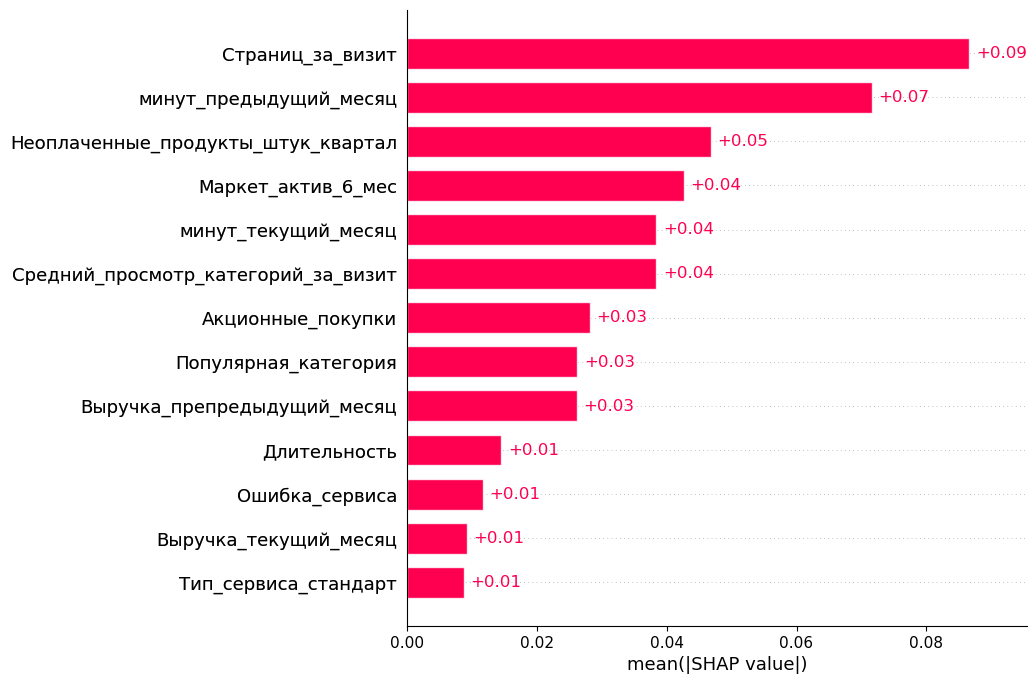

In [176]:
shap.plots.bar(shap_values[..., 1], max_display=13)

Наибольшую ценность для модели составляют среднее количество страниц, которые просмотрел покупатель за последние 3 месяца и количество минут, проведенное на сайте в предыдущем месяце.

Построим график влияния признаков на каждое предсказание. Положительным значениям шапли соответсвует снизившаяся активность покупателя. 

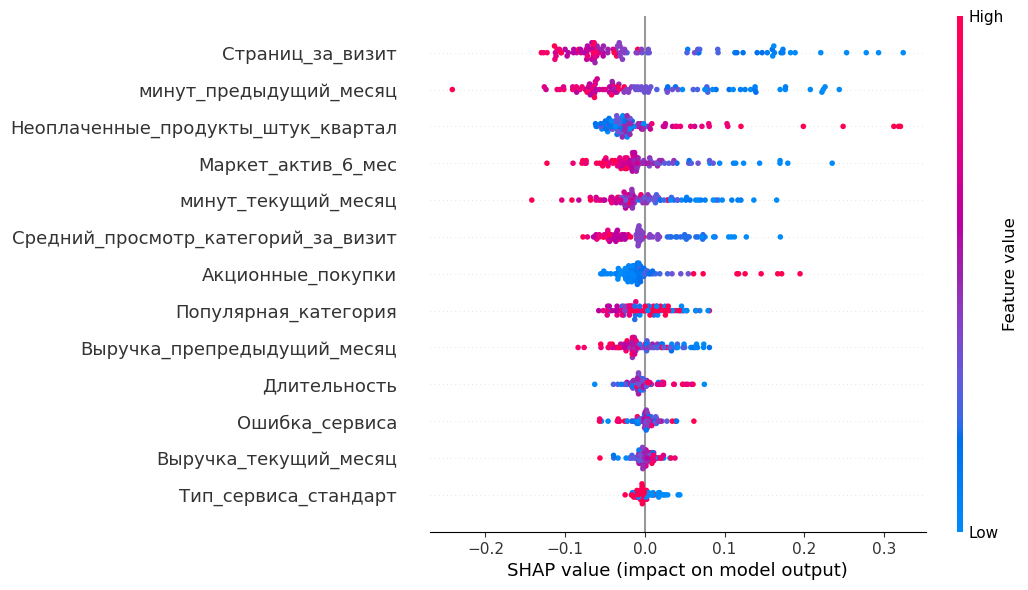

In [177]:
shap.plots.beeswarm(shap_values[:, :, 1], max_display=13)

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно.
</div>  
	  

Посморим на нескольк строк, которым модель неверно присвоила 0 класс.

In [178]:
X_test_new_df = X_test_new.copy().reset_index()
X_test_new_df['y_true'] = y_test
X_test_new_df['y_prob'] = model.predict_proba(X_test_new)[:, 1]

y_bad = X_test_new_df.loc[(X_test_new_df['y_true'] == 1) & (X_test_new_df['y_prob'] < 0.3)]

print(len(y_bad))
      
y_bad.sort_values(by='y_prob').head(10)

43


index  Маркет_актив_6_мес  Длительность  Акционные_покупки  \
222    222            2.017949      1.262475          -0.758450   
164    164           -0.156494     -0.068786          -0.111559   
223    223            1.227243      0.031460           2.556868   
193    193            0.041183     -0.385562          -0.839311   
77      77           -0.255332     -1.472223          -0.435004   
104    104           -0.255332     -0.662239          -0.232851   
244    244            0.535374      1.001837          -0.596727   
215    215            0.634213     -0.533925          -0.556297   
187    187           -0.057656     -1.404056          -0.596727   
291    291            0.634213     -0.906838          -0.151989   

     Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
222                             1.277034                            0.079888   
164                             0.543852                           -0.948607   
223                             1.277034                           -1.462855   
193                            -0.189330                            0.079888   
77                             -0.922512                           -0.434359   
104                            -0.189330                           -0.434359   
244                            -0.189330                            0.079888   
215                             0.543852                           -0.434359   
187                            -0.189330                           -0.434359   
291                             2.010216                           -1.462855   

     Ошибка_сервиса  Страниц_за_визит  Выручка_препредыдущий_месяц  \
222       -0.635589          0.706042                     0.198205   
164       -1.681809         -0.043437                    -1.200218   
223       -0.112479          1.205695                     0.044830   
193       -0.635589          0.206390                    -0.039376   
77         0.933740          1.205695                     0.492927   
104       -0.635589         -0.043437                    -0.646863   
244        1.979960          0.955869                     0.688405   
215       -1.158699          1.455522                     2.095850   
187        0.410631          1.205695                     1.187627   
291       -0.635589         -0.043437                     2.171034   

     Выручка_текущий_месяц  минут_текущий_месяц  минут_предыдущий_месяц  \
222              -0.276395             0.658090               -1.371890   
164               2.196798             2.066006                1.180708   
223              -0.416110             2.066006                0.925448   
193               0.945812            -0.045868                1.435968   
77               -0.196149            -0.280521                0.670188   
104              -0.715841             0.658090                0.925448   
244              -0.062047             1.127395                0.159669   
215               0.614198             0.188784                0.414928   
187               2.145211             0.188784                0.414928   
291               0.681906             0.188784               -0.350851   

     Тип_сервиса_стандарт  Популярная_категория  y_true    y_prob  
222                   0.0                   4.0     1.0  0.008940  
164                   1.0                   1.0     1.0  0.016580  
223                   0.0                   4.0     1.0  0.030798  
193                   1.0                   0.0     1.0  0.037533  
77                    1.0                   1.0     1.0  0.044453  
104                   1.0                   4.0     1.0  0.046826  
244                   1.0                   4.0     1.0  0.047349  
215                   1.0                   5.0     1.0  0.052421  
187                   1.0                   3.0     1.0  0.052632  
291                   1.0                   4.0     1.0  0.056901

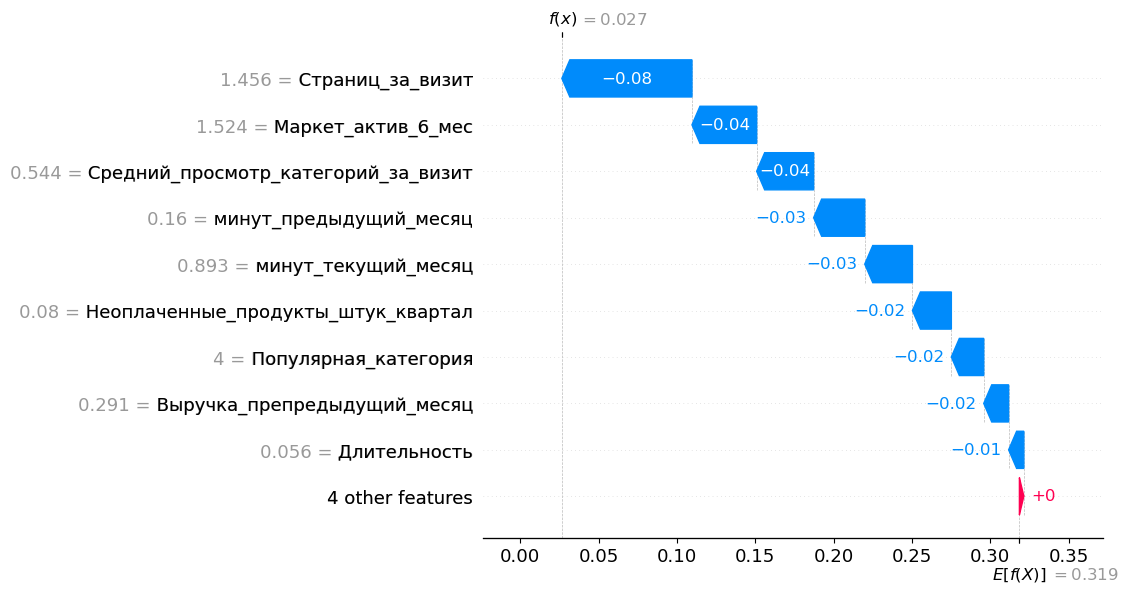

In [179]:
shap.plots.waterfall(shap_values[54, :, 1])

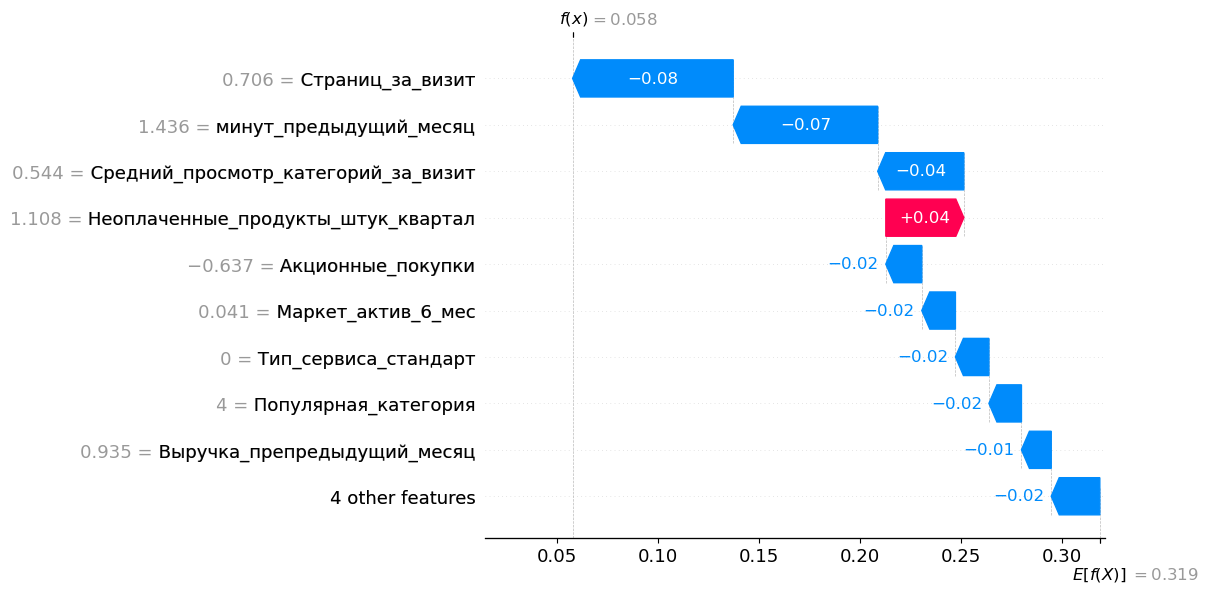

In [157]:
shap.plots.waterfall(shap_values[71, :, 1])

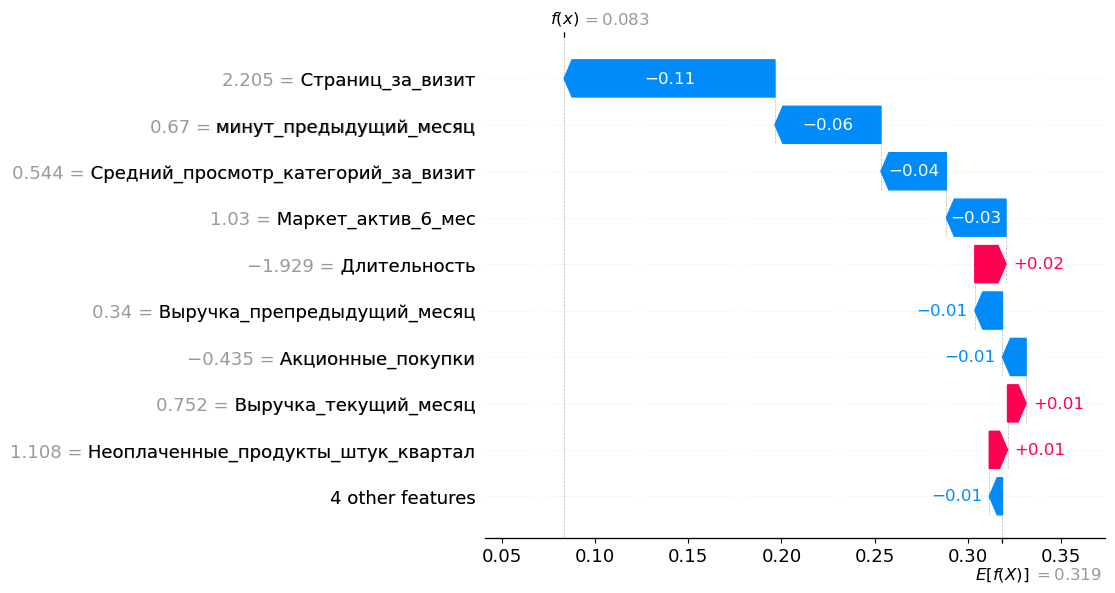

In [159]:
shap.plots.waterfall(shap_values[26, :, 1])

In [160]:
y_bad.sort_values(by='y_prob', ascending=False).head()

index  Маркет_актив_6_мес  Длительность  Акционные_покупки  \
13    282           -1.046039      1.671477          -0.718019   
93     73           -0.354171      0.969758          -0.435004   
56    120            1.227243      0.464520          -0.637158   
73    199            1.622596     -1.961422          -0.313712   
77     34           -0.749524      0.223931          -0.435004   

    Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
13                            -0.189330                           -0.948607   
93                            -0.189330                           -1.462855   
56                             0.543852                            1.108384   
73                            -0.189330                           -0.434359   
77                            -0.922512                           -0.434359   

    Ошибка_сервиса  Страниц_за_визит  Выручка_препредыдущий_месяц  \
13       -0.112479          1.205695                     1.341003   
93       -1.158699         -0.293263                    -0.150649   
56        1.456850         -0.792916                     1.488363   
73       -2.204919          1.455522                    -0.258914   
77       -1.158699         -0.043437                     0.904935   

    Выручка_текущий_месяц  минут_текущий_месяц  минут_предыдущий_месяц  \
13               0.179290             0.188784                0.925448   
93              -0.017863            -0.280521                0.414928   
56              -0.136083             0.188784               -0.095591   
73              -0.616966             0.892743               -1.371890   
77              -1.013063             1.127395                1.946487   

    Тип_сервиса_стандарт  Популярная_категория  y_true    y_prob  
13                   1.0                   5.0     1.0  0.226184  
93                   1.0                   1.0     1.0  0.199287  
56                   1.0                   5.0     1.0  0.192369  
73                   1.0                   5.0     1.0  0.173682  
77                   1.0                   3.0     1.0  0.126788

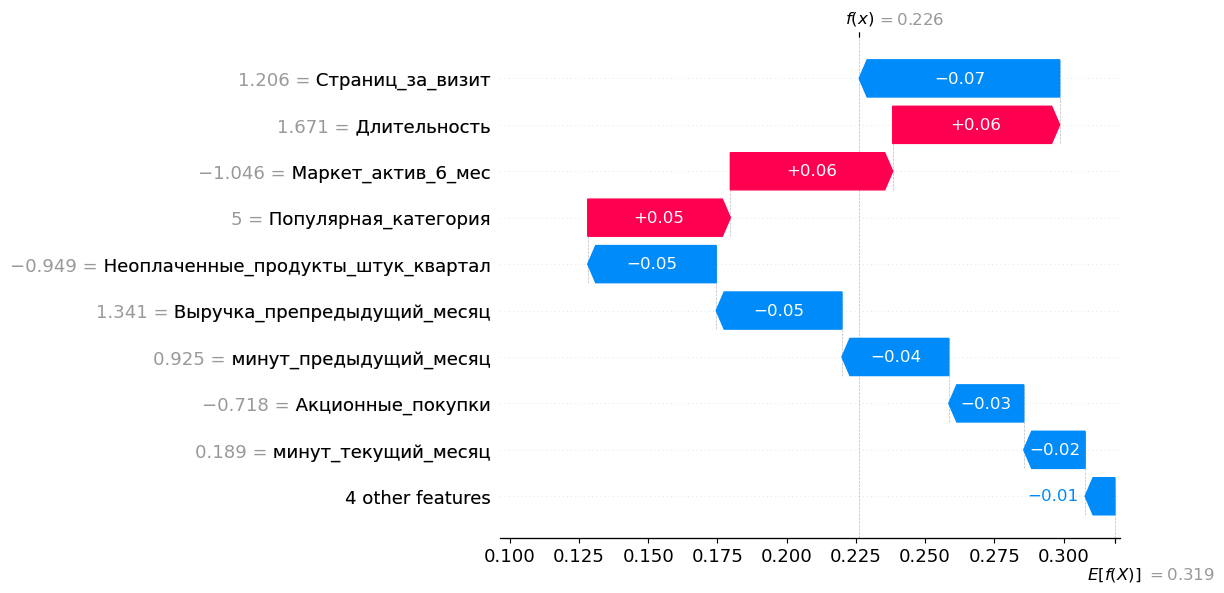

In [161]:
shap.plots.waterfall(shap_values[13, :, 1])

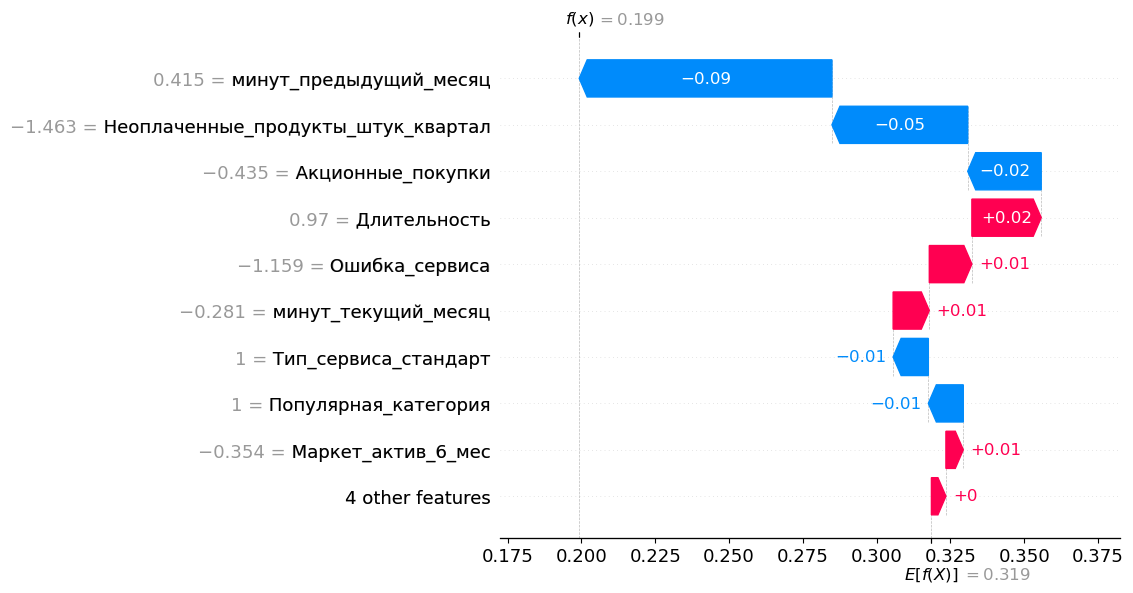

In [162]:
shap.plots.waterfall(shap_values[93, :, 1])

Каких то закономерностей в графиках неверно предсказанных значений выделить не могу.

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь модель ориентируется на веса, а в реальных наблюдениях могут быть существенные отклонения от вероятностных.
    
Например, если покупатель редко посещает сайт, берет все по акции, то модель может отнести его к снижающим активность. Однако в реальности у нас может быть такой лояльный покупатель, который просто не любит тратить время, но любит экономить деньги.
</div>  
	  

### Вывод

Наиболее значимыми для модели являются следующие признаки:
- Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
- Количество минут, проведенное на сайте в предыдущем месяце;
- Количество минут, проведенное на сайте в текущем месяце;
- Общее число неоплаченных товаров в корзине за последние 3 месяца;
- Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев;
- Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
- Среднее количество просмотренных категорий за визит в последнем месяце;
- Популярная категория;
- Выручка в предыдущем месяце;
- Сколько дней прошло с момента регистрации покупателя;
- Выручка в текущем месяце;
- Ошибки сервиса;
- Тип сервиса.

Остальные признаки оказывали меньшее влияние на целевой признак.

По графику влияния признаков на каждое предсказание можно сделать выводы:

1. Малое значение просмотренных страниц и категорий, количество минут проведенное на сайте в текущем и предыдущих месяцах сведельствуют о снижении покупательской активности;
2. Большое количество неоплаченых продуктов в корзине и большая доля покупок по акции у покупателя говорит о том, что активность таких покупателей снизилась;
3. Количество маркетинговых активностей имеет влияние на активность покупателей. Когда их много, это помогает сохранить покупательскую активность, а малое число наоборот снижает эту активность;

По пунктам выше можно сделать вывод, что увеличение маркетинговых активностей, рассылок писем, звонков и т.д. может помочь в удержании активности покупателей. Увеличение количества различных акций поможем удержать клиентов, которые чаще совершают акционные покупки и, возможно, тех, кто держит много неоплаченных товаров в корзине. По неоплаченным продуктам в корзине, можно провести дополнительный анализ, который поможет выявить в них некоторые закономерности, например цена на некоторые товары или категории товаров могут быть завышены и люди ждут снижения цен на них. Имеет смысл также проанализировать удобство сайта, возможно это позволит увеличить время, которое покупатели проводят на сайте, что может положительно скахаться на их покупательской активности.

	 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Важно не путать корреляцию с причинностью. Значок недостатка топлива в баке не является причиной остановки автомобиля, хотя и коррелирует с фактом остановки. 
    
Количество просмотренных страниц говорят об интересе пользователя к сайту, поэтому коррелируют с активностью. Также и количество маркетинговых активностей у нас будет больше у тех пользователей, которые появляются на сайте и которым в принципе может прийти пуш. Если клиент не заходит на сайт и удалил приложение, то у него закономерно будет меньше маркетинговых активностей. 
    
`увеличение маркетинговых активностей, рассылок писем, звонков` - а много ли реальные маркетплейсы делают звонков клиентам или пишут персональных писем на почту? Кажется, что немного, потому что это вызывает негактивную реакицию.
        
</div> 
  


## Сегментация покупателей

Проанализируем группу покупателей с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. Долю покупок по акции примем больше 0,8, а вероятность снижения активности больше 0,9.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отличный выбор.
</div>    
  

In [180]:
features = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Выручка_препредыдущий_месяц',
       'Выручка_текущий_месяц', 'минут_текущий_месяц',
       'минут_предыдущий_месяц', 'Тип_сервиса',
       'Популярная_категория']

In [181]:
df_segment_train = X_train[features].copy()
df_segment_train['y_pred'] = model.predict_proba(X_train_new)[:, 1]

In [182]:
df_segment_test = X_test[features].copy()
df_segment_test['y_pred'] = model.predict_proba(X_test_new)[:, 1]

In [183]:
df_segment = pd.concat([df_segment_train, df_segment_test])

In [184]:
df_segment.head()

Маркет_актив_6_мес  Длительность  Акционные_покупки  \
180                  4.4           773               0.98   
1118                 5.5           985               0.24   
268                  4.0           862               0.25   
1004                 5.8           624               0.26   
581                  4.0           599               0.15   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
180                                     3                                   3   
1118                                    5                                   4   
268                                     2                                   7   
1004                                    2                                   3   
581                                     2                                   8   

      Ошибка_сервиса  Страниц_за_визит  Выручка_препредыдущий_месяц  \
180                8                 6                       4502.0   
1118               4                13                       4410.0   
268                6                 5                       4308.0   
1004               7                 8                       5143.0   
581                4                 7                       4983.0   

      Выручка_текущий_месяц  минут_текущий_месяц  минут_предыдущий_месяц  \
180                  6103.3                    8                       8   
1118                 4839.6                   15                      14   
268                  6055.1                    8                      10   
1004                 5065.8                   13                      19   
581                  6042.6                   19                      15   

     Тип_сервиса                  Популярная_категория    y_pred  
180     стандарт  Мелкая бытовая техника и электроника  0.983527  
1118     премиум                     Домашний текстиль  0.060262  
268     стандарт                      Товары для детей  0.988083  
1004    стандарт                       Кухонная посуда  0.052742  
581      премиум                      Товары для детей  0.924247

In [185]:
df_segment_promo = df_segment.loc[(df_segment['y_pred'] >= 0.9) & (df_segment['Акционные_покупки'] >= 0.8)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно
 
</div> 


In [186]:
df_segment_promo.shape

(115, 14)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что не забываешь проверить количество наблюдений в сегменте. 114 - вполне достаточно для некоторого анализа.
    
 
</div> 


In [187]:
df_segment_promo.head()

Маркет_актив_6_мес  Длительность  Акционные_покупки  \
180                 4.4           773               0.98   
94                  2.4           298               0.89   
259                 3.0           862               0.94   
161                 4.0           982               0.94   
4                   5.1          1064               0.94   

     Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
180                                    3                                   3   
94                                     6                                   3   
259                                    1                                   5   
161                                    3                                   1   
4                                      3                                   2   

     Ошибка_сервиса  Страниц_за_визит  Выручка_препредыдущий_месяц  \
180               8                 6                       4502.0   
94                2                 3                       4917.0   
259               2                 8                       4313.0   
161               2                 6                       4880.0   
4                 3                 2                       4594.0   

     Выручка_текущий_месяц  минут_текущий_месяц  минут_предыдущий_месяц  \
180                 6103.3                    8                       8   
94                  4371.2                    5                       8   
259                 4922.2                   11                       9   
161                 5299.3                    6                       8   
4                   5872.5                   11                       8   

    Тип_сервиса                  Популярная_категория    y_pred  
180    стандарт  Мелкая бытовая техника и электроника  0.983527  
94     стандарт                     Домашний текстиль  0.969422  
259     премиум                 Косметика и аксесуары  0.993940  
161     премиум  Мелкая бытовая техника и электроника  0.990971  
4      стандарт                      Товары для детей  0.982655

В новый датасет попало 115 покупателей.

Посмотрим, как отличалось количество минут, проведенные на сайте в прошлый и в текущий месяцы.

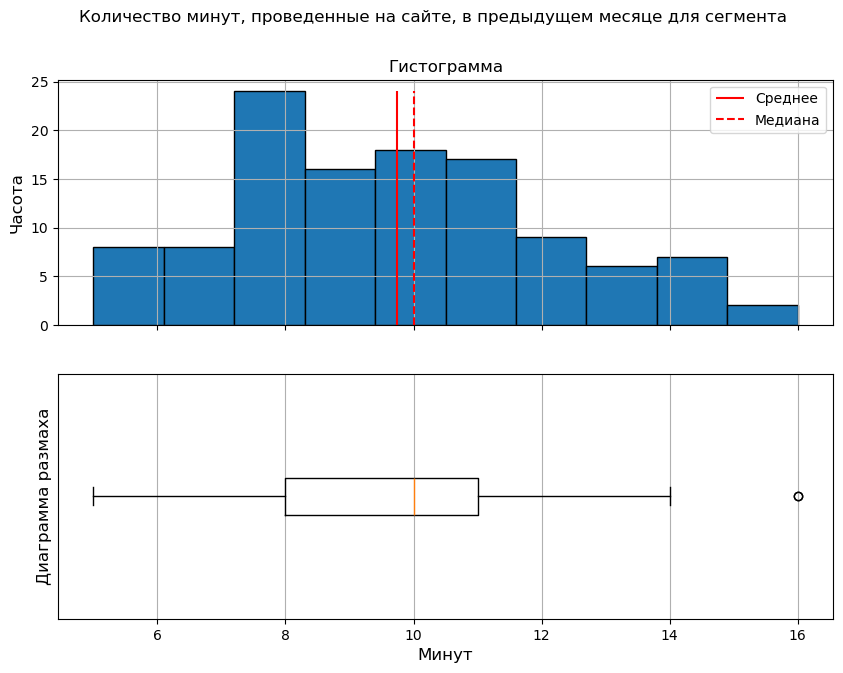

count    115.000000
mean       9.747826
std        2.320176
min        5.000000
25%        8.000000
50%       10.000000
75%       11.000000
max       16.000000
Name: минут_предыдущий_месяц, dtype: float64


In [188]:
hist_box_plot(
    df_segment_promo['минут_предыдущий_месяц'], 
    bins=10, 
    title='Количество минут, проведенные на сайте, в предыдущем месяце для сегмента', 
    x_lable='Минут'
)

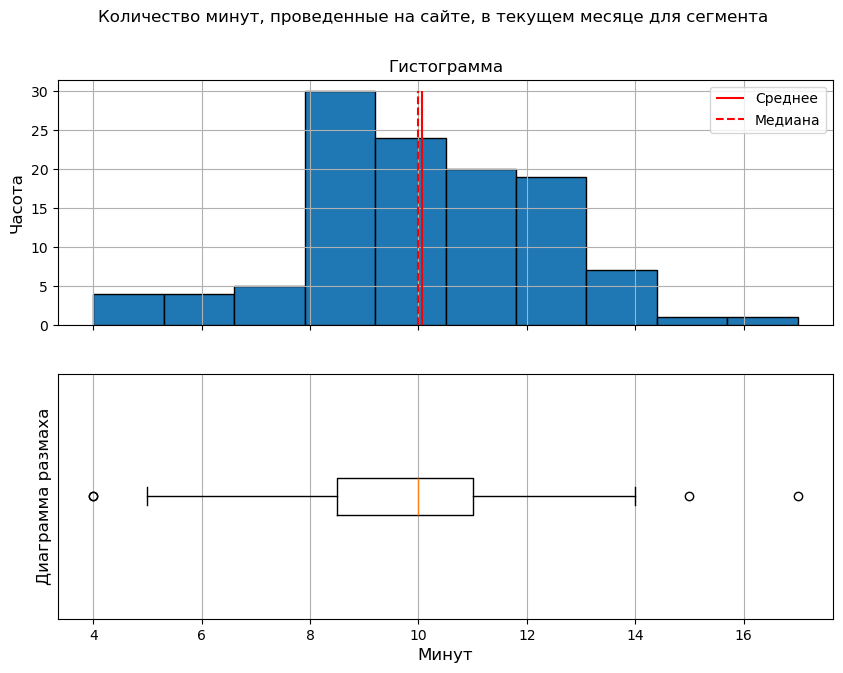

count    115.000000
mean      10.060870
std        2.351882
min        4.000000
25%        8.500000
50%       10.000000
75%       11.000000
max       17.000000
Name: минут_текущий_месяц, dtype: float64


In [189]:
hist_box_plot(
    df_segment_promo['минут_текущий_месяц'], 
    bins=10, 
    title='Количество минут, проведенные на сайте, в текущем месяце для сегмента', 
    x_lable='Минут'
)

Активность за оба месяца особо не различается. Посмотрим, как отличаются данные от общей выборки.

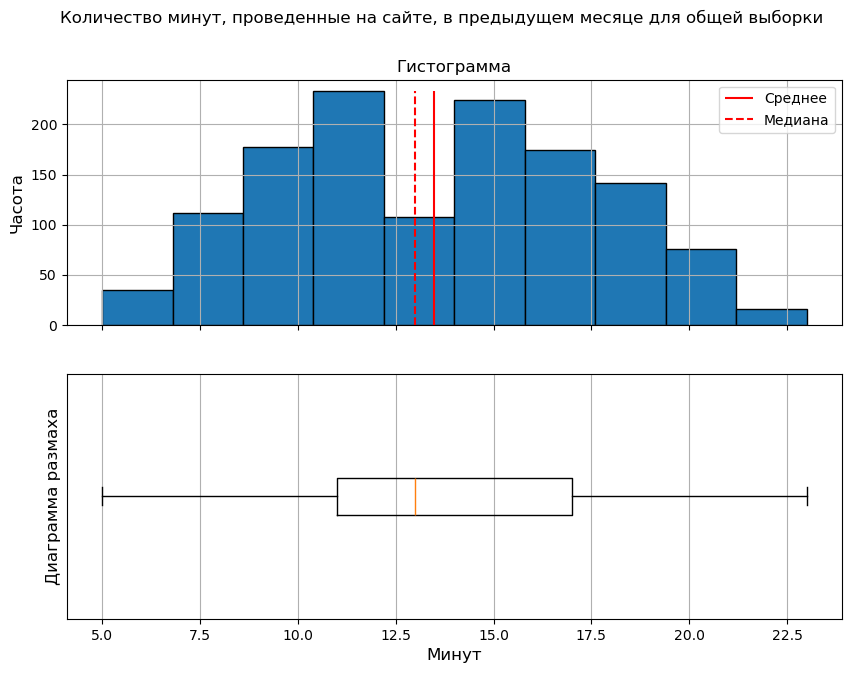

count    1297.000000
mean       13.469545
std         3.936323
min         5.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: минут_предыдущий_месяц, dtype: float64


In [190]:
hist_box_plot(
    data_market['минут_предыдущий_месяц'], 
    bins=10, 
    title='Количество минут, проведенные на сайте, в предыдущем месяце для общей выборки', 
    x_lable='Минут'
)

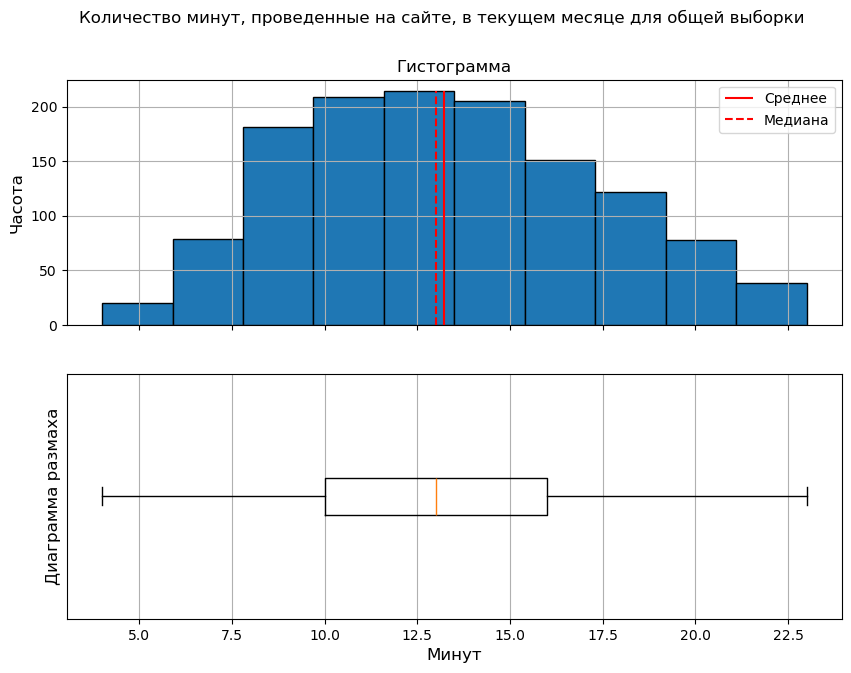

count    1297.000000
mean       13.211257
std         4.220222
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут_текущий_месяц, dtype: float64


In [191]:
hist_box_plot(
    data_market['минут_текущий_месяц'], 
    bins=10, 
    title='Количество минут, проведенные на сайте, в текущем месяце для общей выборки', 
    x_lable='Минут'
)

Покупатели в прошлом и текущем месяце в среднем проводили на сайте около 13 минут, а покупатели из сегмента около 10.

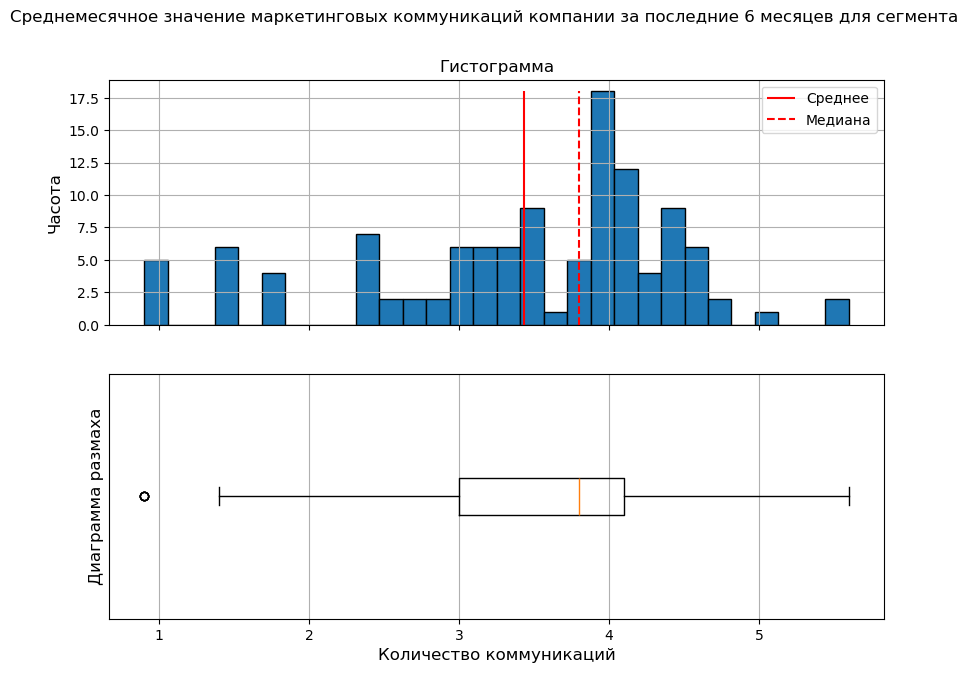

count    115.000000
mean       3.435652
std        1.050997
min        0.900000
25%        3.000000
50%        3.800000
75%        4.100000
max        5.600000
Name: Маркет_актив_6_мес, dtype: float64


In [192]:
hist_box_plot(
    df_segment_promo['Маркет_актив_6_мес'], 
    bins=30, 
    title='Среднемесячное значение маркетинговых коммуникаций компании за последние 6 месяцев для сегмента', 
    x_lable='Количество коммуникаций'
)

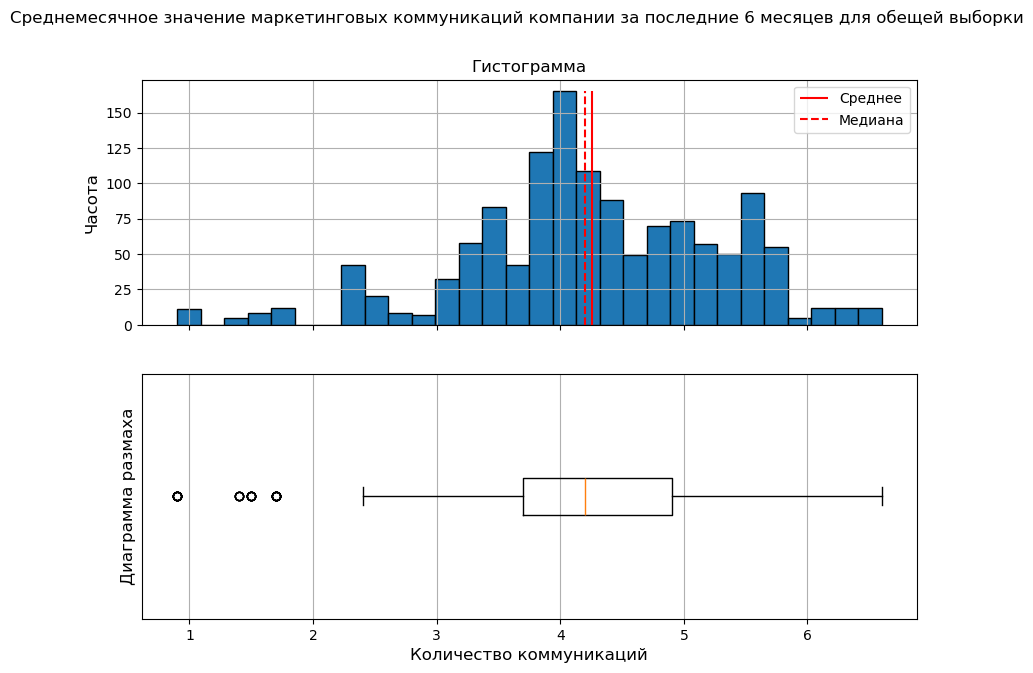

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64


In [193]:
hist_box_plot(
    data_market_file['Маркет_актив_6_мес'], 
    bins=30, 
    title='Среднемесячное значение маркетинговых коммуникаций компании за последние 6 месяцев для обещей выборки', 
    x_lable='Количество коммуникаций'
)

В среднем у покупателей из сегмента было меньше маркентинговых взаимодействий с сайтом, чем у покупателей из общей выборки.

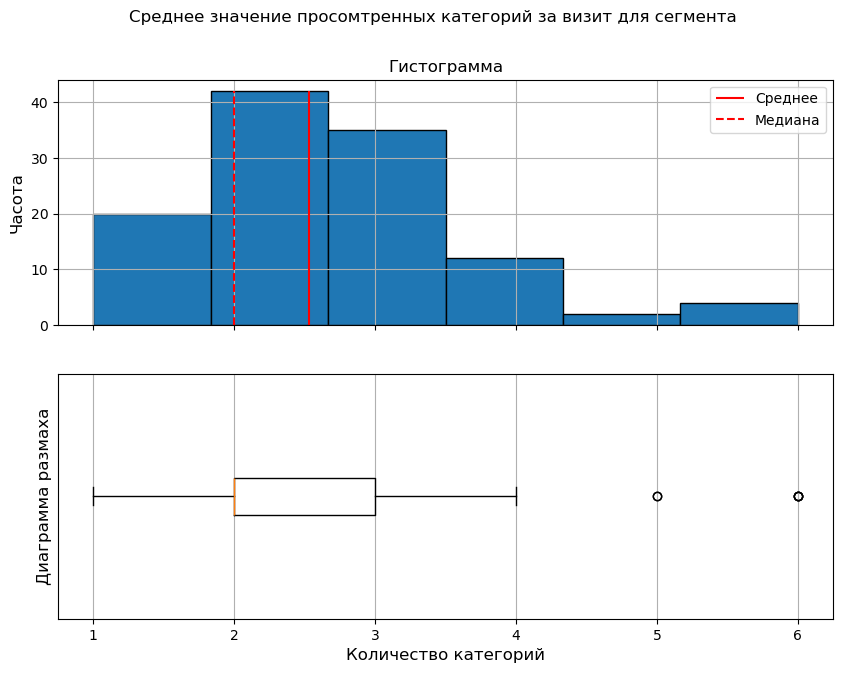

count    115.000000
mean       2.530435
std        1.157142
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


In [194]:
hist_box_plot(
    df_segment_promo['Средний_просмотр_категорий_за_визит'], 
    bins=6, 
    title='Среднее значение просомтренных категорий за визит для сегмента', 
    x_lable='Количество категорий'
)

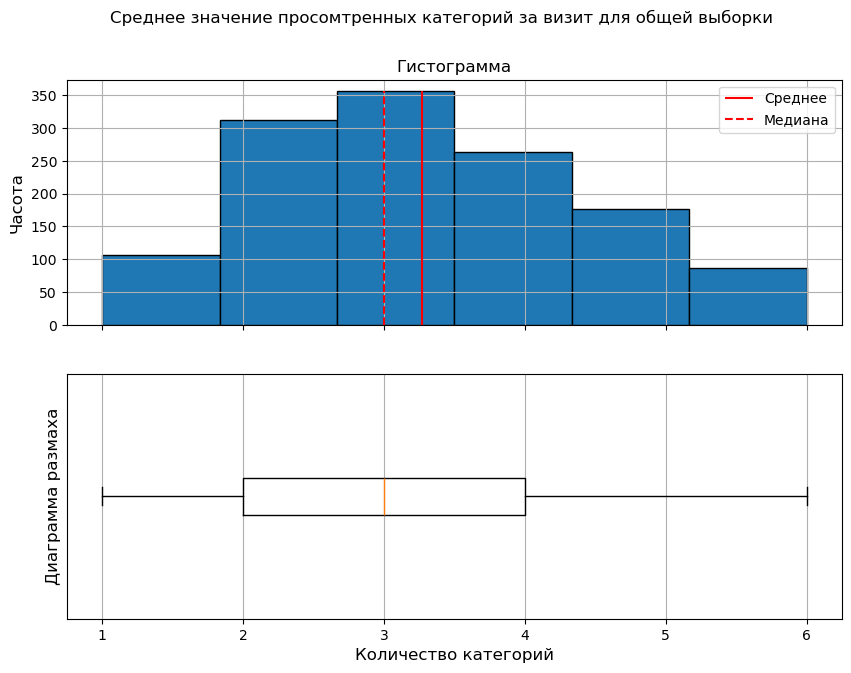

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


In [195]:
hist_box_plot(
    data_market_file['Средний_просмотр_категорий_за_визит'], 
    bins=6, 
    title='Среднее значение просомтренных категорий за визит для общей выборки', 
    x_lable='Количество категорий'
)

Покупатели из сегмента просматривали в среднем за визит меньше категорий, чем покупатели из общей выборки. Эти данные коррелируют с данными о минутах проведенных на сайте.

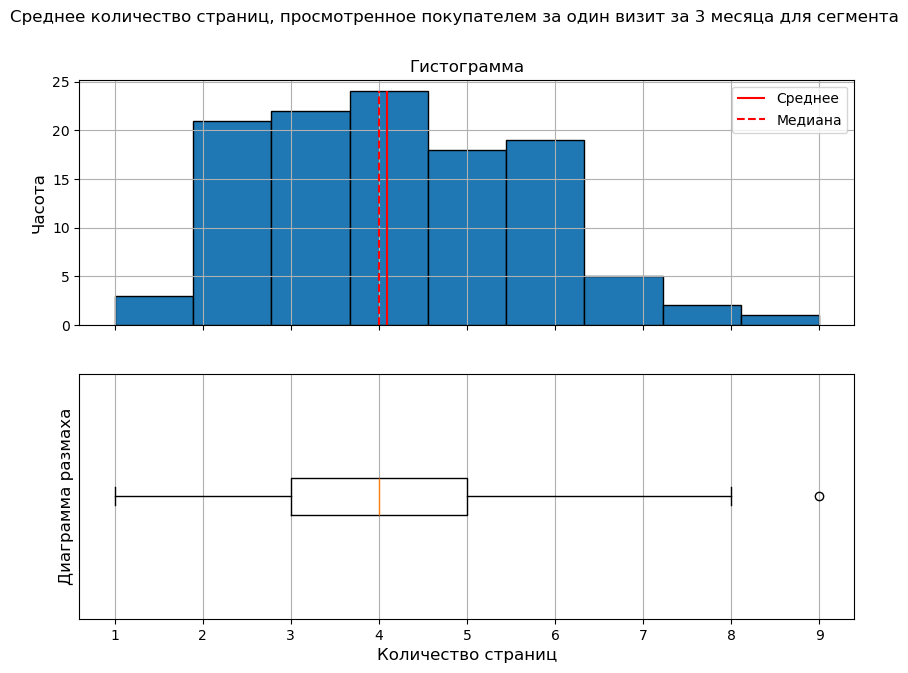

count    115.000000
mean       4.095652
std        1.696094
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: Страниц_за_визит, dtype: float64


In [196]:
hist_box_plot(
    df_segment_promo['Страниц_за_визит'], 
    bins=9, 
    title='Среднее количество страниц, просмотренное покупателем за один визит за 3 месяца для сегмента', 
    x_lable='Количество страниц'
)

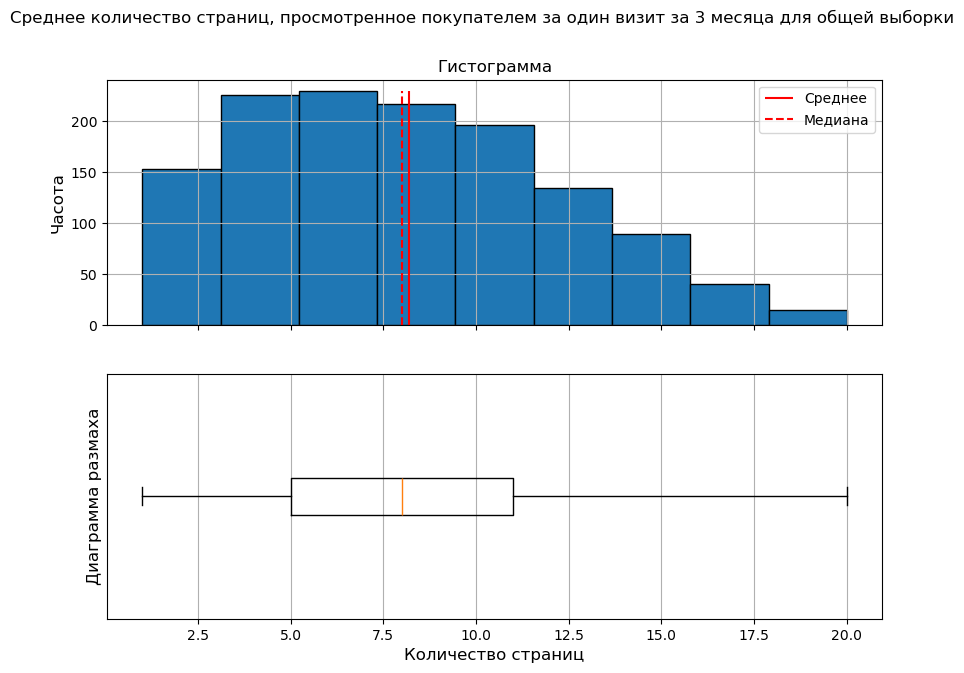

count    1297.000000
mean        8.186584
std         3.977061
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64


In [197]:
hist_box_plot(
    data_market['Страниц_за_визит'], 
    bins=9, 
    title='Среднее количество страниц, просмотренное покупателем за один визит за 3 месяца для общей выборки', 
    x_lable='Количество страниц'
)

Среднее количество просмотренных страниц у сегмента покупателей отличается в целых 2 раза по сравнению с покупателями из общей выборке. Различия в этой категории сильно выше, чем различия в просмотренных категориях и минутах, проведенных на сайте. Вероятно, покупателям, которые часто совершают покупки по акции, тяжело найти интересные для себя товары.

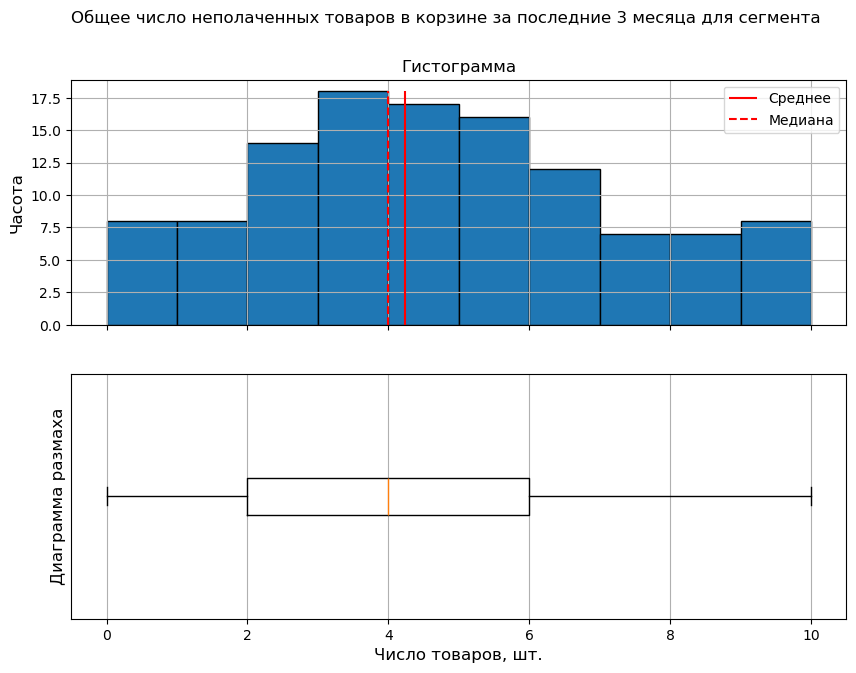

count    115.000000
mean       4.243478
std        2.508202
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


In [198]:
hist_box_plot(
    df_segment_promo['Неоплаченные_продукты_штук_квартал'], 
    bins=10, 
    title='Общее число неполаченных товаров в корзине за последние 3 месяца для сегмента', 
    x_lable='Число товаров, шт.'
)

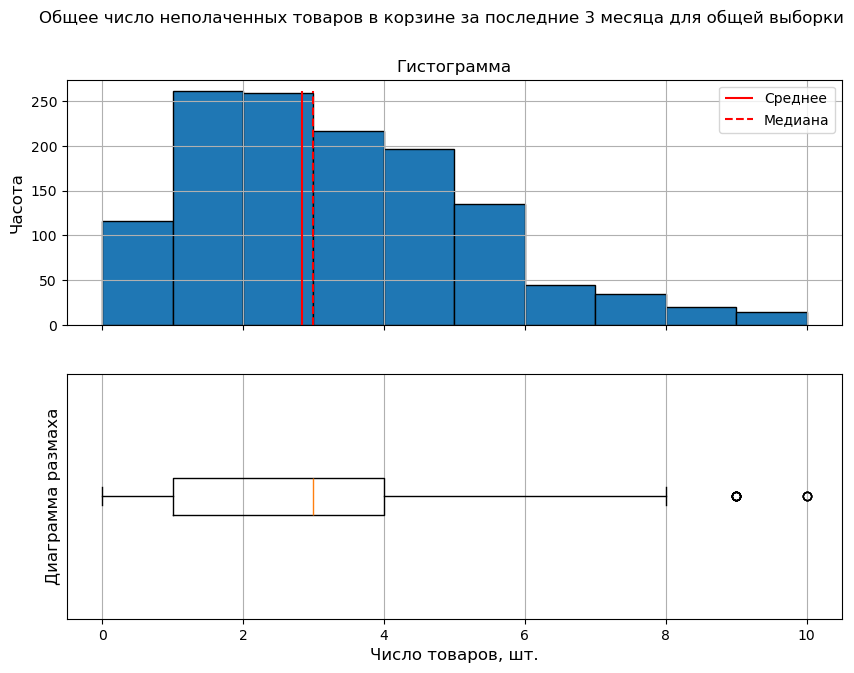

count    1297.000000
mean        2.841172
std         1.973451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


In [199]:
hist_box_plot(
    data_market['Неоплаченные_продукты_штук_квартал'], 
    bins=10, 
    title='Общее число неполаченных товаров в корзине за последние 3 месяца для общей выборки', 
    x_lable='Число товаров, шт.'
)

Число неоплаченных продуктов в корзине у сегмента покупателей, которые предпочитают покупки по акции, тоже сильно отличается от общей выборки, практически в 1,5 раза.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Думаю, очень важно будет проанализировать, какие категории товара будут популярными у нашего сегмента. И особенно полезно посмотреть выручку по категориям по периодам, чтобы увидеть, спрос на какие категории постоянный, а на какие − снижается. Это точно поможет сформулировать полезные предложения по удержанию сегмента.
        
</div> 

### Вывод

В рамках работы был проведен анализ категории покупателей, которые совершают преимущественно покупки по акции и имеют снизившуюся покупательскую активность. 

Мои предложения по работе с данным сегментов покупателей:

- Кол-во минут проведенных на сайте у покупателей из сегмента меньше, (примерно на треть) чем у покупателей из общей выборки. Это можно списать на то, что в сегменте представлены только покупатели со снизившейся покупательской активностью. При этом стоило ожидать такого же отклонения в процентом соотношении в просмотренных категориях и страницах, но этого не происходит. Разница в просмотренных страницах у сегмента покупателей меньше вдвое, чем у покупателей из общей выборке. Это может говорить о том, что покупателям трудно найти на сайте товары, которые могут их заинтересовать. Мое предложения - добавить (или улучшить) систему рекомендаций для данной категории покупателей и улучшить пользовательский опыт во взаимодействии с сайтом, например добавить фильтр по акционным товарам в поиске, если таковой отсутствует.

- Количество маркетинговых взаимодейтвий у анализируемого сегмента покупателей ниже, чем у покупателей из общей выборки. Стоит увеличить количество таких взаимодействий с данным сегментом, например делать больше рассылок с акционными товарами. Этот показатель неплохо влияет на удержание клиентов из общей выборки, и он должен быть особенно важен при взаимодействии с клиентами, которых интересуют акции.

- Допольнительно стоит провести анализ неоплаченных товаров в корзинах покупателей из данного сегмента. Анализ показывает, что у этих покупателей в 1,5 раза больше товаров в корзине, чем у покупателей из общей выборки. Учитывая, что товары в корзине могут лежать в ожиданни скидок, стоит ввести дополнительные уведомления покупателей, когда эти товары получают в магахине скидку.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Все три фактора: количество просматриваемых страниц, маркетинговых взаимодействий и неоплаченных товаров могут быть следствием простой незаинтересованности в покупках.
    
Например, допустим, у нас была некоторая акция для новых клиентов, которым дали значительные скидки. Эти клиенты были активными, пока была акция, а как акция завершилась, то они побросали свои товары в корзине, перестали заходить на сайт. В результате у нас уменьшася показатели просмотров и взаимодействий, увеличится среднее количество неоплаченных товаров в корзине. Но вряд ли будет верно сказать, что пользователи побровали товары, потому что не получали уведомлений или потому что система рекомендаций сайта была плохая. И наверное в таком случае будет гораздо эффективнее выявить проблему с окончанием акции, попробовать как-то привлечь покупателей чем-то вроде новой акции.
    
Часть рекомендаций, которые ты даешь, скорее всего сработают:
    
* рекомендательная система на сайте,
* уведомления о скидках и изменении цен на товары в корзине.
    
Но они слабо связаны с проведенным выше анализом и логически не вытекают из наших данных (если принять, что у нас не все корреляции являются причинно-следственными).
    
С рекомендациями по изменению сайта я бы был осторожен, так как это дорогостоящий и длительный процесс. У нас нет данных о сайте (мы сам сайт не видели, не знаем о существующих рекомендациях, о глубине просмотров пользователями и пользовательском опыте). Как я написал выше, поведение клиентов может быть не связанным с состоянием сайта. 
    
Точно нужно добавить рекомендаций, основанных на покупательском поведении. Я бы попробовал продолжить какую-то акцию на товары, которые будут интересны нашему сегменту. Важно проанализировать популярные категории и дать выводы на основании категорий.
    
    
</div> 

In [200]:
features

['Маркет_актив_6_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'Выручка_препредыдущий_месяц',
 'Выручка_текущий_месяц',
 'минут_текущий_месяц',
 'минут_предыдущий_месяц',
 'Тип_сервиса',
 'Популярная_категория']

## Вывод

В данной работе необходимо было обучить модель машнного обучения, которая предсказывает снижение покупательскй активности клиентов интернет-магазина, выделить один сегмент покупателей в интернет магазине и провести его анализ. В рамках анализа привести предложение по увеличению покупательской активности выбранного сегмента.

Для решения задачи обучения модели данные были предварительно обработаны и подготовлены для для дальнейшего использования для обучения модели. 

Для поиска лучшей модели машинного обучения был разработан пайплайн, который перебирал различные комбинации моделей, их гиперпараметров и способы масштабирования численных признаков.

Модели, которые участвовали в пайплайне: 
- Логистическая регрессия;
- Метод опорных веторов;
- Метод k-ближайших соседей;
- Дерево решений.

Лучшая модель и ее гиперпараметры:
- Модель SVC (метод опорных векторов);
- Ядро модели - rbf;
- Параметр C = 1;
- Метод масштабирования численных столбцов - стандартизация.

Для лучшей модели был проведен анализ важности принаков по результатам которого модель достигла лучших показателей со следующими столбцами:
- Маркет_актив_6_мес;
- Длительность;
- Акционные_покупки;
- Средний_просмотр_категорий_за_визит;
- Неоплаченные_продукты_штук_квартал;
- Ошибка_сервиса;
- Страниц_за_визит;
- Выручка_препредыдущий_месяц;
- Выручка_текущий_месяц;
- минут_текущий_месяц;
- минут_предыдущий_месяц;
- Тип_сервиса;
- Популярная_категория.

В рамках анализа сегмента покупателей был проанализирован сегмент покупателей, которые совершают большую часть покупок по акции и имеют снизившуюся покупательскую активность. В рамках анализа были приведены графики, описывающие данный сегмент покупателей и сделаны выводы. Предложения по увеличвению покупательской активности данного сегмента:

- Добавление или улучшение системы рекомендаций для данной категории покупателей и улучшение пользовательского опыта во взаимодействии с сайтом, например добавление фильтра по акционным товарам в поиске, если таковой отсутствует;
-  Увеличение количества маркентиговых взаимодействий с покупателями из данного сегмента: больше рассылок с акционными товарами, звонков и т.д.
- Проведение дополнительного анализа неоплаченных товаров в корзинах у покупателей из данного сегмента.

 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Выводы необходимо будет перепроверить и синхронизировать с проектом выше.
       
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Эта работа также была достаточно объемной и требовала концентрации внимания. По структуре проекта, логичности действий и общему подходу все замечательно, что не может не радовать.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошие решения в коде, есть пояснения и аргументации.
* Грамотная предобработка и подготовка признаков.
* Корректное обучение моделей, использование пайплайнов.

    
**На что стоит обратить внимание🤔**
    
* Важно в исследовательском анализе рассмотреть отдельно подвыборки для клиентов со снижающейся и с постоянной активностью (делим по целевому признаку).
* Необходимо отфильтровать данные, оставив только клиентов, активных в каждый из трех периодов.
* Важно пересчитать ROC_AUC по вероятностям классов.
* Рекомендую также углубить и исследование сегмента: там, где можем, смотрим на динамику в категориях товаров. Думаю, как минимум, это подтвердит наши выводы, ну и возможно как-то их уточнит.
* Эти и остальные замечания я также написал по ходу проекта.    

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>

